# 1. Data Exploring

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

### 1-1) 데이터 불러오기

In [4]:
PATH="C:/Users/castl/Desktop/2020_job_academy/project/credit"
Ptrain=pd.read_csv(PATH+'/train.csv')
Ptest=pd.read_csv(PATH+'/test.csv')
Psub=pd.read_csv(PATH+'/sample_submission.csv')

### 1-2) 데이터 형태 및 info 확인

In [5]:
# shape으로 형태 알아보기

print('Train data shape:',Ptrain.shape)
print('Test data shape:',Ptest.shape)

Train data shape: (26457, 20)
Test data shape: (10000, 19)


## 훈련 데이터 확인

In [6]:
# basic statics of data
Ptrain.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [7]:
# basic information of data whether null type, data type, columns
Ptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### 데이터 변수 설명


 - index

 - gender: 성별

 - car: 차량 소유 여부

 - reality: 부동산 소유 여부

 - child_num: 자녀 수
 
 - income_total: 연간 소득

 - income_type: 소득 분류

 - edu_type: 교육 수준

 - family_type: 결혼 여부

 - house_type: 생활 방식

 - DAYS_BIRTH: 출생일
			
               데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

 - DAYS_EMPLOYED: 업무 시작일

			   데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
               
               양수 값은 고용되지 않은 상태를 의미함

 - FLAG_MOBIL: 핸드폰 소유 여부

 - work_phone: 업무용 전화 소유 여부

 - phone: 전화 소유 여부

 - email: 이메일 소유 여부

 - occyp_type: 직업 유형													

 - family_size: 가족 규모

 - begin_month: 신용카드 발급 월
			
				데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

 - credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도

				 낮을 수록 높은 신용의 신용카드 사용자를 의미함	

### 1-3) 결측값 확인

In [8]:
# 각 feature마다 null 값확인값확인
Ptrain.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [9]:
# null값의 퍼센트확인
(Ptrain['occyp_type'].isna().sum()/len(Ptrain['occyp_type']))*100

30.884076047926822

In [10]:
Ptrain['occyp_type'].value_counts().sort_index()

Accountants               902
Cleaning staff            403
Cooking staff             457
Core staff               2646
Drivers                  1575
HR staff                   62
High skill tech staff    1040
IT staff                   41
Laborers                 4512
Low-skill Laborers        127
Managers                 2167
Medicine staff            864
Private service staff     243
Realty agents              63
Sales staff              2539
Secretaries                97
Security staff            424
Waiters/barmen staff      124
Name: occyp_type, dtype: int64

### 결측값 분석

- 약 30%의 occyp_type이 null값(결측값)이다.

### 1-4) Feature info 확인 및 feature 분석

In [11]:
# view unique value of each columns to find 

for column in Ptrain.columns.unique():
    print(column,'\n', Ptrain[column].unique())

index 
 [    0     1     2 ... 26454 26455 26456]
gender 
 ['F' 'M']
car 
 ['N' 'Y']
reality 
 ['N' 'Y']
child_num 
 [ 0  1  2  3  4  5 14 19  7]
income_total 
 [ 202500.   247500.   450000.   157500.   270000.   315000.   180000.
  103500.   193500.   135000.   216000.   225000.   405000.   112500.
  121500.   585000.    90900.    99000.    67500.   292500.    90000.
  495000.    54000.   306000.   130500.   144000.   360000.    40500.
   81000.   351000.   184500.    45000.    79650.   153000.   126000.
  382500.   283500.   175500.   297000.   387000.   337500.   256500.
   72000.   540000.   155250.   189000.   139500.   459000.   720000.
  252000.   171000.   427500.    78750.    94500.   562500.   238500.
  630000.    76500.   301500.   229500.   148500.   166500.   463500.
  432000.   117000.   787500.   234000.   108000.   279000.   900000.
  378000.    31500.    29250.   211500.   207000.    49500.    65250.
  265500.   261000.   162000.   310500.   373500.   140850.   123750.

### 데이터 타입별 분석

- 명목형 data: gender, car, reality, income_type, edu_type, family_type, house_type, work_phone, phone, email,occyp_type

- 순서형 data: edu_type

- 수치형 data: child_num, income_total,DAYS_BIRTH, DAYS_EMPLOYED, begin_month

- FLAG_MOBILE의 모든 값은 1임으로 무의미한 feature이다.(drop 예정)

In [12]:
# credit의 분포

Ptrain['credit'].value_counts().sort_index()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [13]:
# gender의 남녀 성비

Ptrain['gender'].value_counts().sort_index()

F    17697
M     8760
Name: gender, dtype: int64

### 명목형 데이터 시각화 및 분석

In [14]:
# feature에 따른 값 확인으로 feature별 분포 확인(명목형 자료)

def bargraph(feature):
    x=Ptrain[feature].unique()
    y=[]
    for i in x:
        y.append(len(Ptrain[Ptrain[feature]==i]))
    plt.figure(figsize=(16,10))
    plt.bar(x,y)
    plt.show()

In [15]:
# feature마다 credit의 분포 확인

def creditbar(feature):
    print(Ptrain.groupby([feature,'credit'])['credit'].count())
    for i in range(len(Ptrain[feature].unique())):
        a=Ptrain[feature]== (Ptrain[feature].unique()[i])
        for j in range(len(Ptrain['credit'].unique())):
            b=Ptrain['credit']==(Ptrain['credit'].unique()[j])
            print('credit:{}에서 {}:{} 인 값의 퍼센테이지 ->  {}%'.format(Ptrain['credit'].unique()[j], feature, Ptrain[feature].unique()[i], len(Ptrain[a & b])*100//len(Ptrain[a])))
    
    sns.barplot(x=feature,y='credit',data=Ptrain)

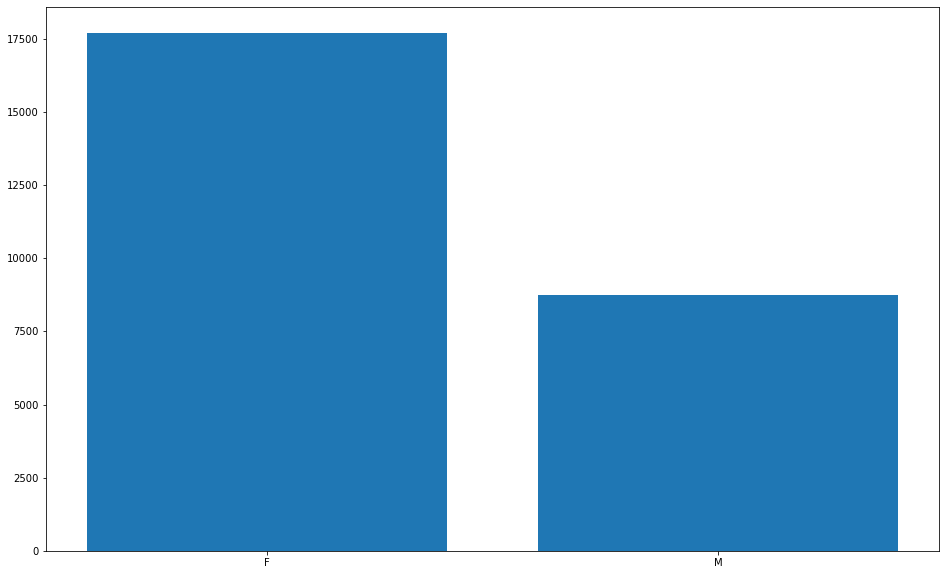

In [16]:
bargraph('gender')

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64
credit:1.0에서 gender:F 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:F 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:F 인 값의 퍼센테이지 ->  12%
credit:1.0에서 gender:M 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:M 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:M 인 값의 퍼센테이지 ->  12%


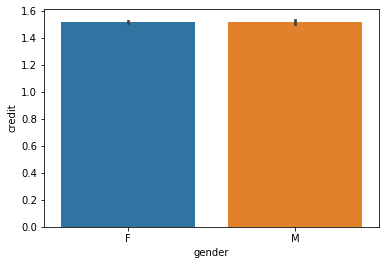

In [17]:
creditbar('gender')

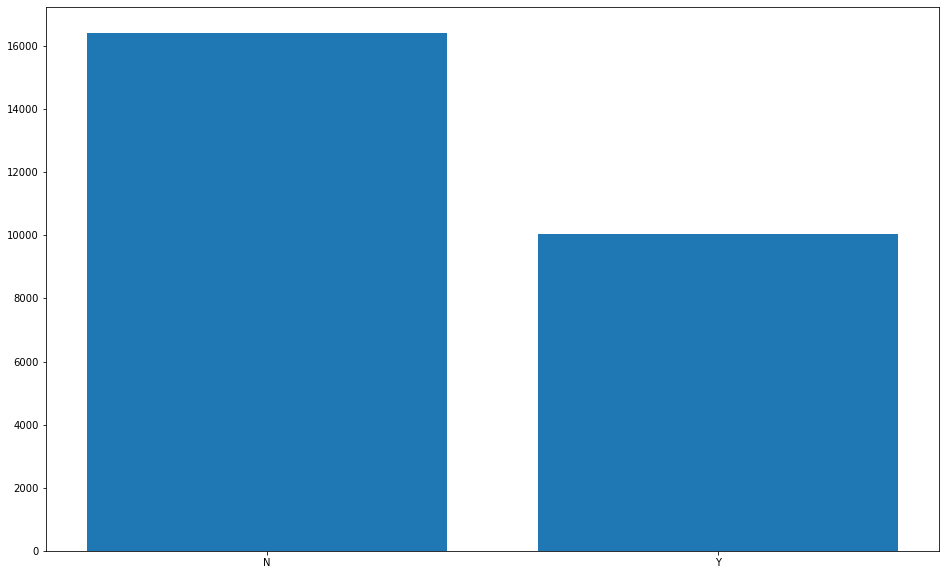

In [18]:
bargraph('car')

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64
credit:1.0에서 car:N 인 값의 퍼센테이지 ->  24%
credit:2.0에서 car:N 인 값의 퍼센테이지 ->  63%
credit:0.0에서 car:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 car:Y 인 값의 퍼센테이지 ->  22%
credit:2.0에서 car:Y 인 값의 퍼센테이지 ->  64%
credit:0.0에서 car:Y 인 값의 퍼센테이지 ->  12%


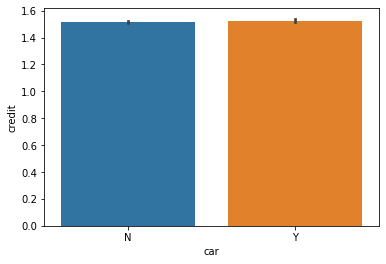

In [19]:
creditbar('car')

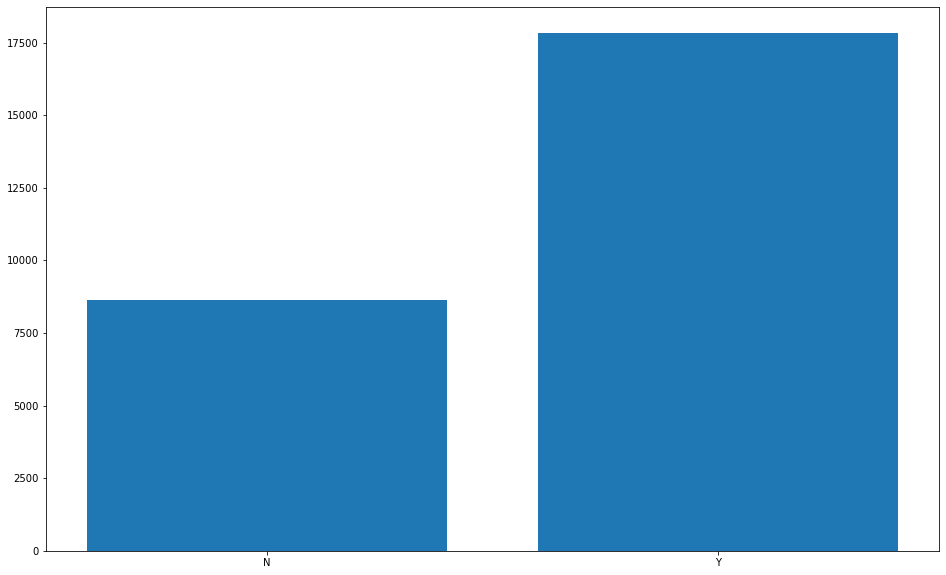

In [20]:
bargraph('reality')

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64
credit:1.0에서 reality:N 인 값의 퍼센테이지 ->  22%
credit:2.0에서 reality:N 인 값의 퍼센테이지 ->  65%
credit:0.0에서 reality:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 reality:Y 인 값의 퍼센테이지 ->  24%
credit:2.0에서 reality:Y 인 값의 퍼센테이지 ->  63%
credit:0.0에서 reality:Y 인 값의 퍼센테이지 ->  12%


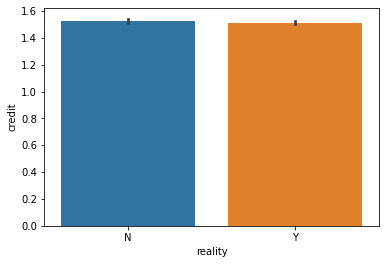

In [21]:
creditbar('reality')

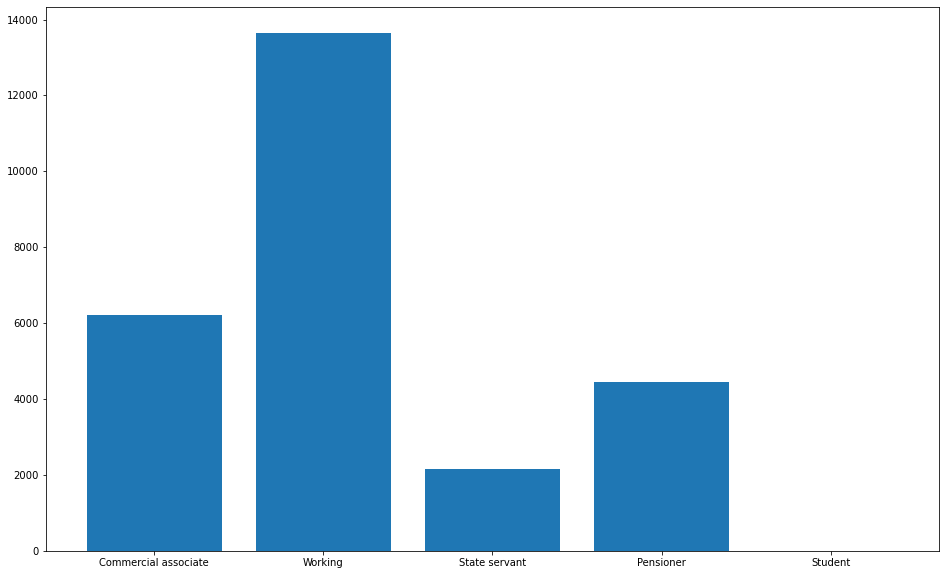

In [22]:
bargraph('income_type')

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64
credit:1.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  21%
credit:2.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  65%
credit:0.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:Working 인 값의 퍼센테이지 ->  24%
credit:2.0에서 income_type:Working 인 값의 퍼센테이지 ->  63%
credit:0.0에서 income_type:Working 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:State servant 인 값의 퍼센테이지 ->  22%
credit:2.0에서 inco

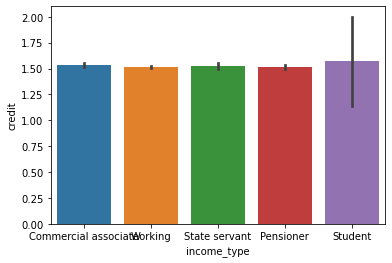

In [23]:
creditbar('income_type')

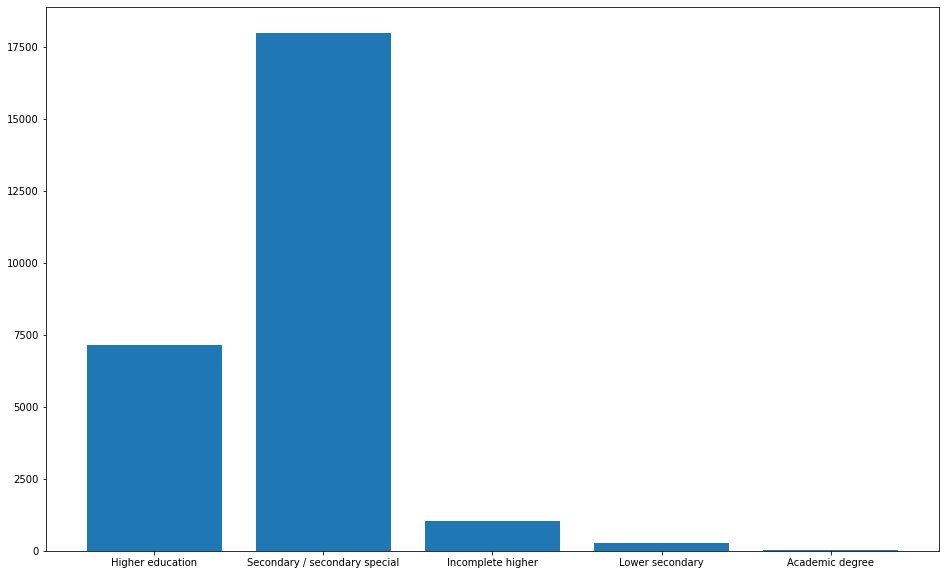

In [24]:
bargraph('edu_type')

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11622
Name: credit, dtype: int64
credit:1.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  24%
credit:2.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  62%
credit:0.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  12%
credit:1.0에서 edu_type:Secondary / secondary special 인 값의

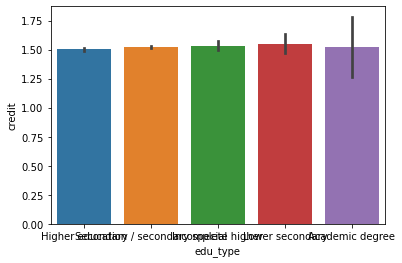

In [25]:
creditbar('edu_type')

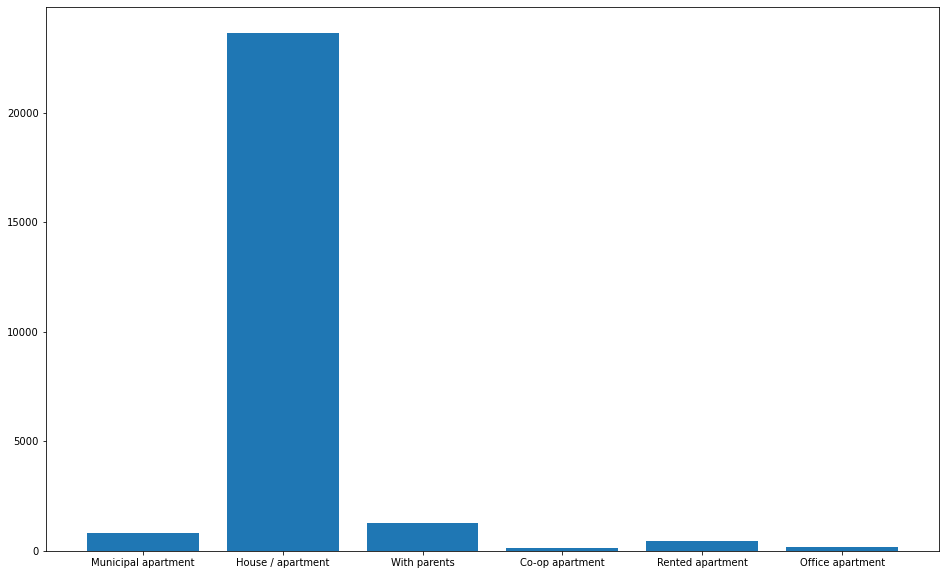

In [26]:
bargraph('house_type')

house_type           credit
Co-op apartment      0.0          14
                     1.0          30
                     2.0          66
House / apartment    0.0        2873
                     1.0        5569
                     2.0       15211
Municipal apartment  0.0         110
                     1.0         160
                     2.0         548
Office apartment     0.0          24
                     1.0          48
                     2.0         118
Rented apartment     0.0          50
                     1.0         147
                     2.0         232
With parents         0.0         151
                     1.0         313
                     2.0         793
Name: credit, dtype: int64
credit:1.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  19%
credit:2.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  66%
credit:0.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  13%
credit:1.0에서 house_type:House / apartment 인 값의 퍼센테이지 ->  23%
credit:2.0에서 house_type:House

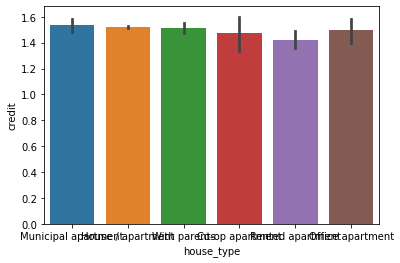

In [27]:
creditbar('house_type')

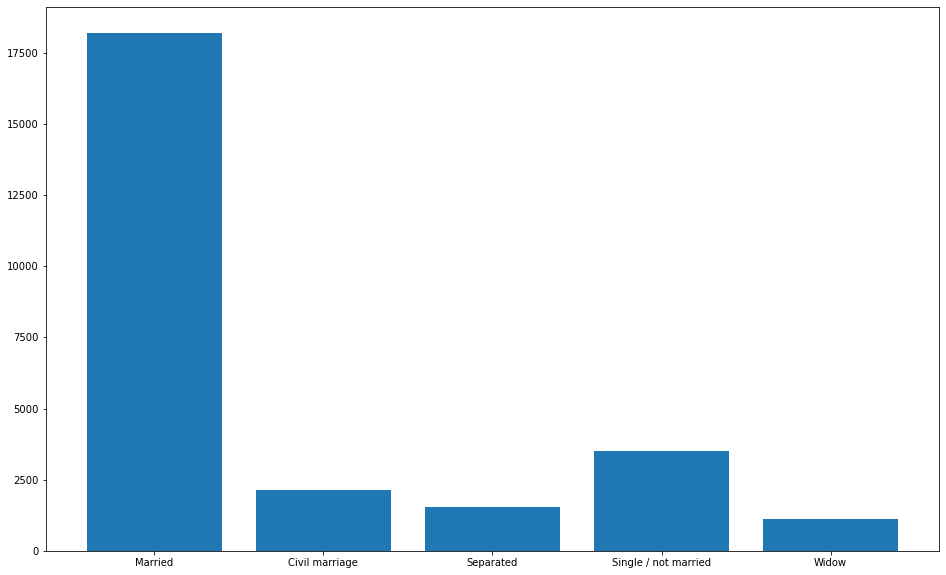

In [28]:
bargraph('family_type')

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64
credit:1.0에서 family_type:Married 인 값의 퍼센테이지 ->  22%
credit:2.0에서 family_type:Married 인 값의 퍼센테이지 ->  65%
credit:0.0에서 family_type:Married 인 값의 퍼센테이지 ->  12%
credit:1.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  25%
credit:2.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  61%
credit:0.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  13%
credit:1.0에서 family_type:Separated 인 값의 퍼

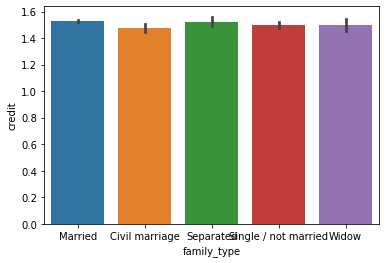

In [29]:
creditbar('family_type')

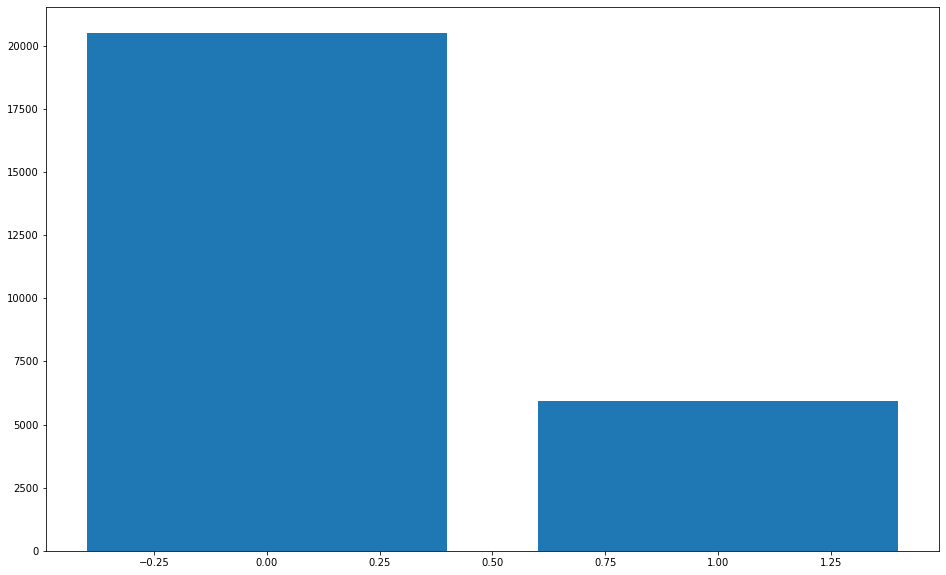

In [30]:
bargraph('work_phone')

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64
credit:1.0에서 work_phone:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:0 인 값의 퍼센테이지 ->  64%
credit:0.0에서 work_phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 work_phone:1 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:1 인 값의 퍼센테이지 ->  63%
credit:0.0에서 work_phone:1 인 값의 퍼센테이지 ->  12%


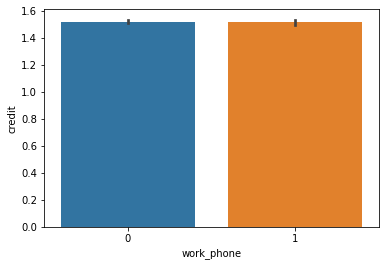

In [31]:
creditbar('work_phone')

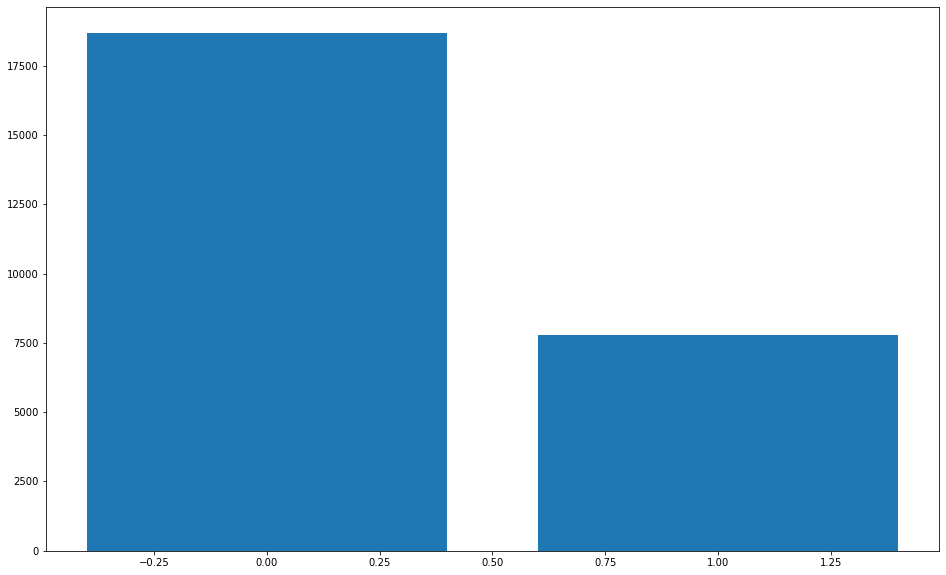

In [32]:
bargraph('phone')

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64
credit:1.0에서 phone:0 인 값의 퍼센테이지 ->  24%
credit:2.0에서 phone:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 phone:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 phone:1 인 값의 퍼센테이지 ->  64%
credit:0.0에서 phone:1 인 값의 퍼센테이지 ->  12%


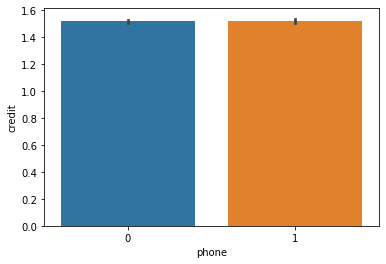

In [33]:
creditbar('phone')

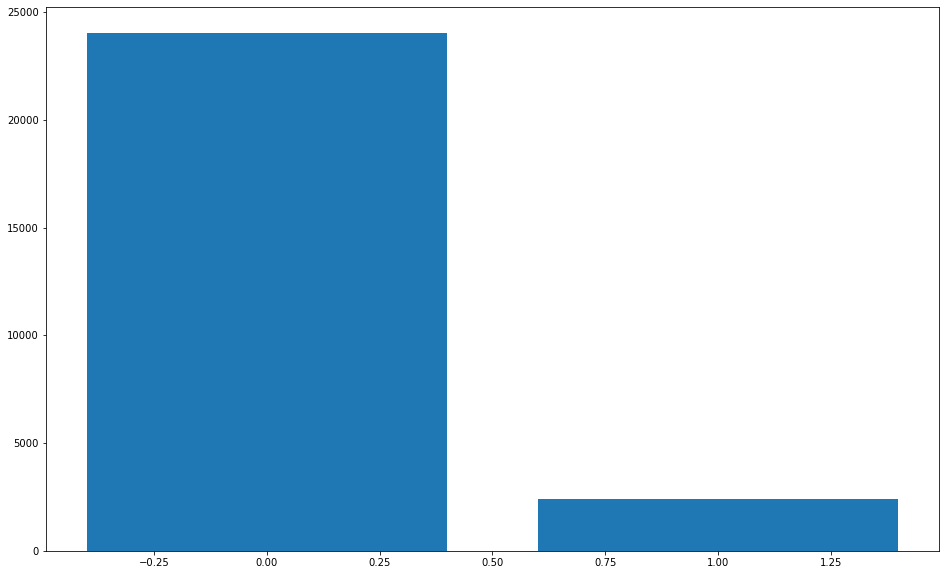

In [34]:
bargraph('email')

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64
credit:1.0에서 email:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 email:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 email:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 email:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 email:1 인 값의 퍼센테이지 ->  66%
credit:0.0에서 email:1 인 값의 퍼센테이지 ->  11%


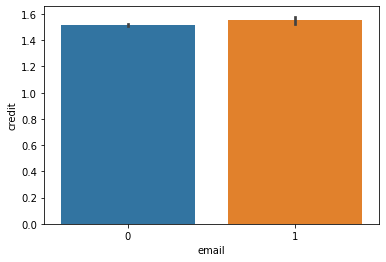

In [35]:
creditbar('email')

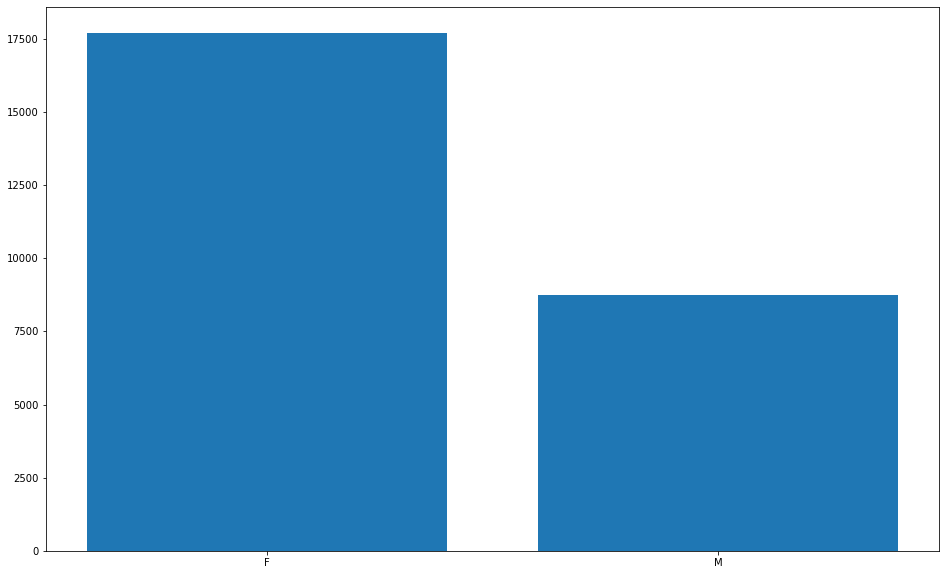

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64
credit:1.0에서 gender:F 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:F 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:F 인 값의 퍼센테이지 ->  12%
credit:1.0에서 gender:M 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:M 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:M 인 값의 퍼센테이지 ->  12%



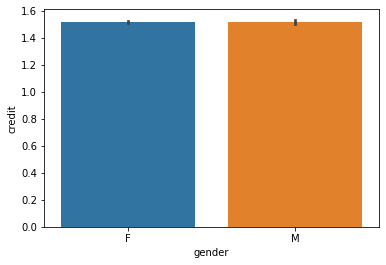

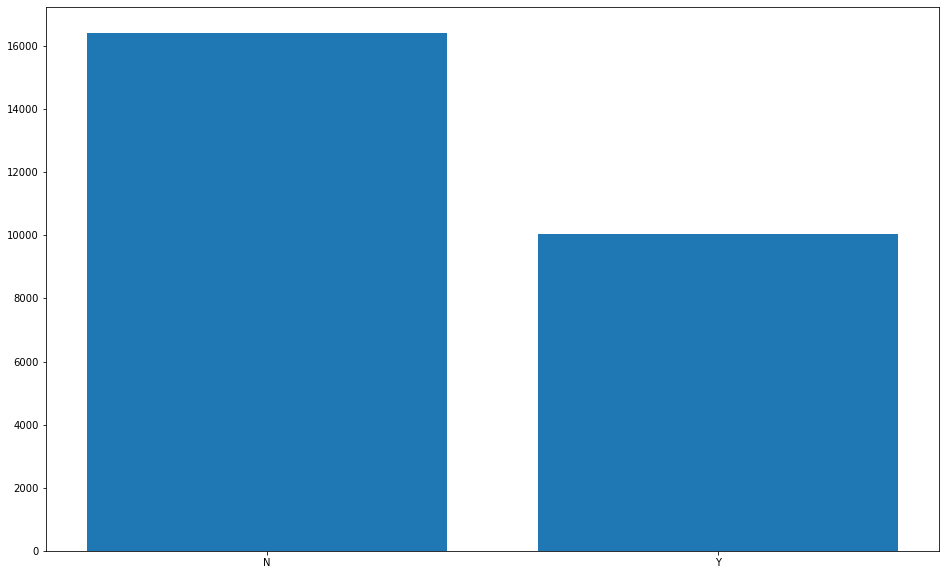

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64
credit:1.0에서 car:N 인 값의 퍼센테이지 ->  24%
credit:2.0에서 car:N 인 값의 퍼센테이지 ->  63%
credit:0.0에서 car:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 car:Y 인 값의 퍼센테이지 ->  22%
credit:2.0에서 car:Y 인 값의 퍼센테이지 ->  64%
credit:0.0에서 car:Y 인 값의 퍼센테이지 ->  12%



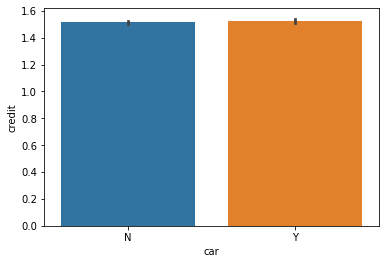

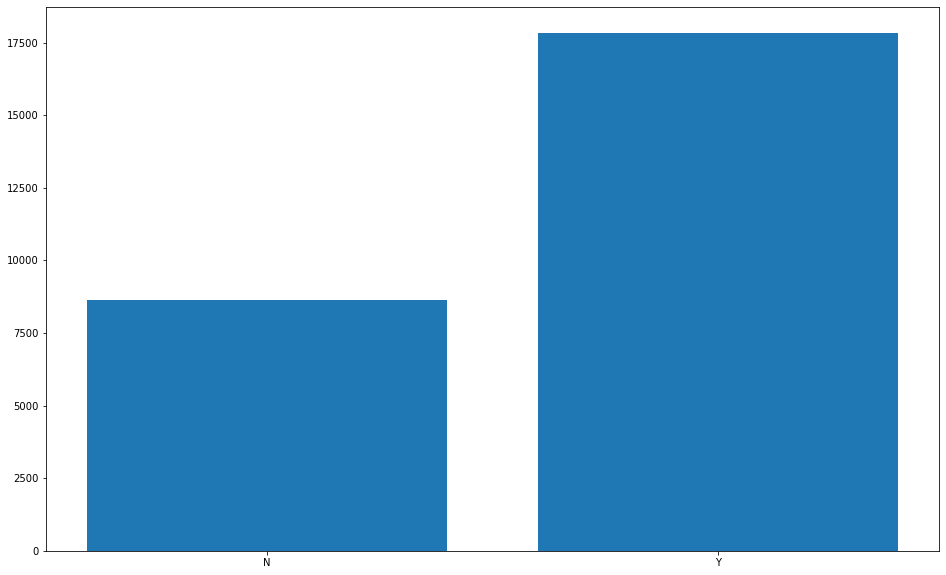

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64
credit:1.0에서 reality:N 인 값의 퍼센테이지 ->  22%
credit:2.0에서 reality:N 인 값의 퍼센테이지 ->  65%
credit:0.0에서 reality:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 reality:Y 인 값의 퍼센테이지 ->  24%
credit:2.0에서 reality:Y 인 값의 퍼센테이지 ->  63%
credit:0.0에서 reality:Y 인 값의 퍼센테이지 ->  12%



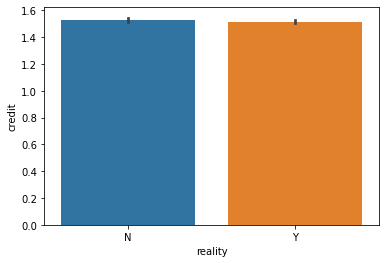

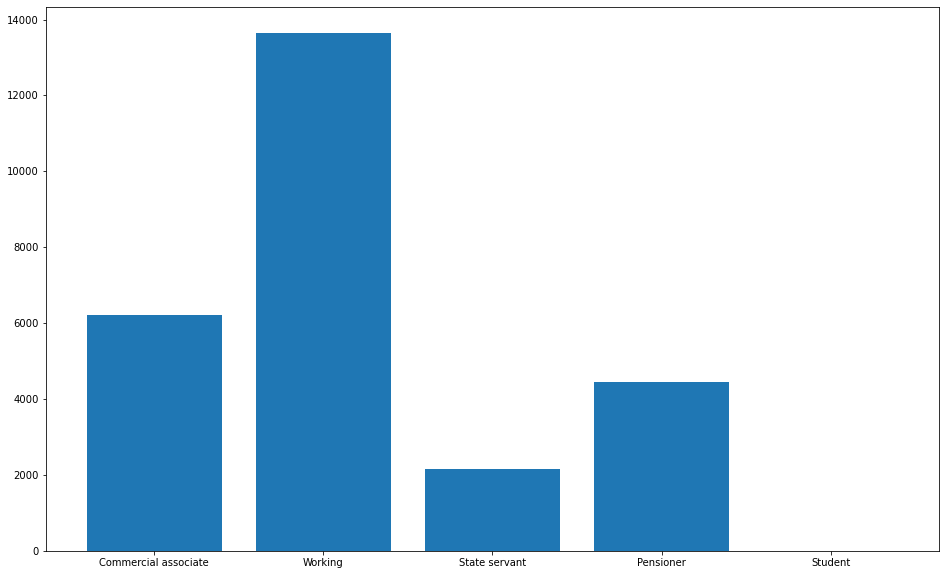

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64
credit:1.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  21%
credit:2.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  65%
credit:0.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:Working 인 값의 퍼센테이지 ->  24%
credit:2.0에서 income_type:Working 인 값의 퍼센테이지 ->  63%
credit:0.0에서 income_type:Working 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:State servant 인 값의 퍼센테이지 ->  22%
credit:2.0에서 inco

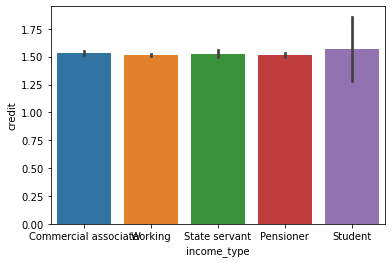

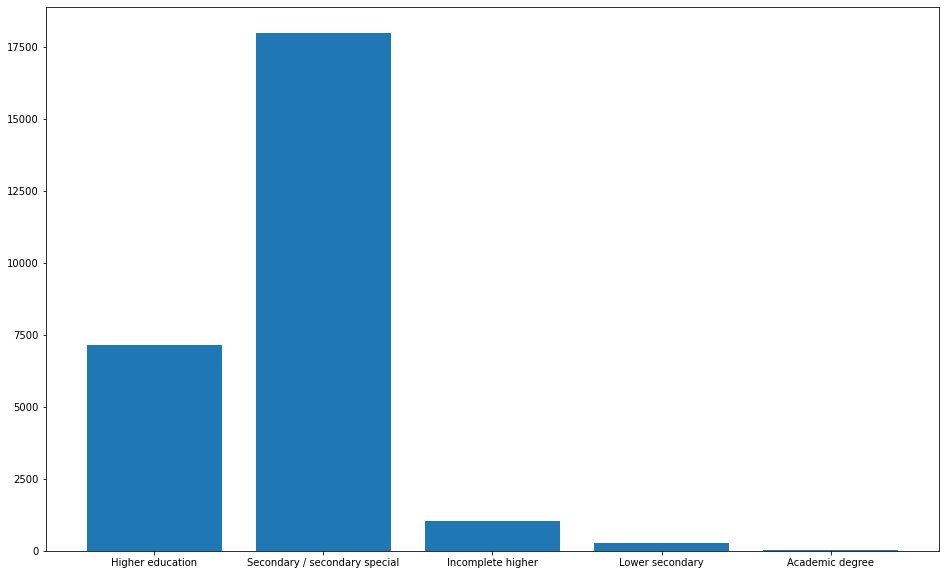

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11622
Name: credit, dtype: int64
credit:1.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  24%
credit:2.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  62%
credit:0.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  12%
credit:1.0에서 edu_type:Secondary / secondary special 인 값의

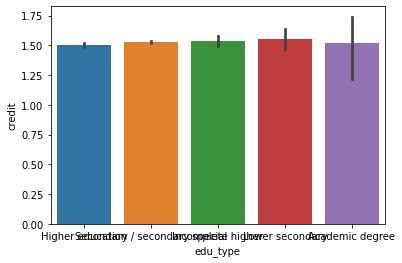

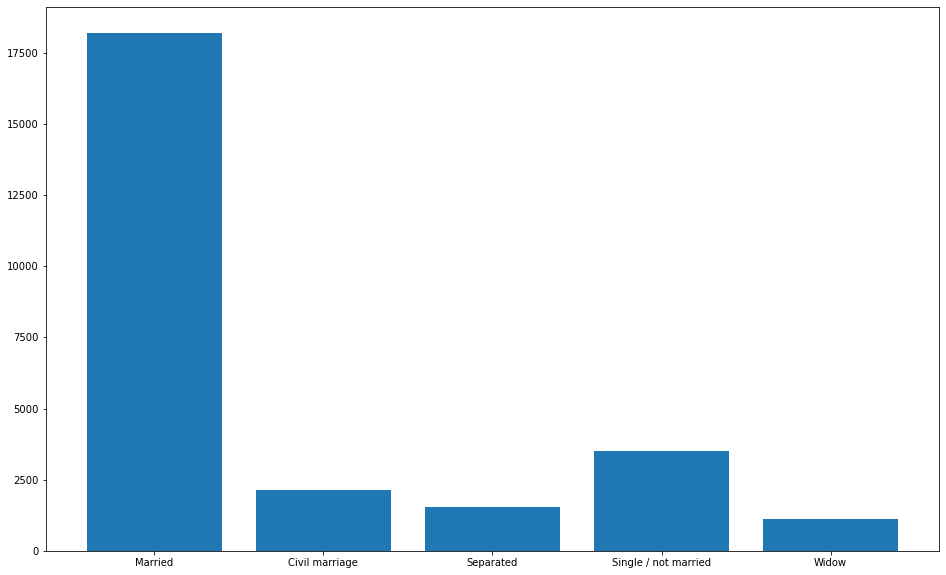

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64
credit:1.0에서 family_type:Married 인 값의 퍼센테이지 ->  22%
credit:2.0에서 family_type:Married 인 값의 퍼센테이지 ->  65%
credit:0.0에서 family_type:Married 인 값의 퍼센테이지 ->  12%
credit:1.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  25%
credit:2.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  61%
credit:0.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  13%
credit:1.0에서 family_type:Separated 인 값의 퍼

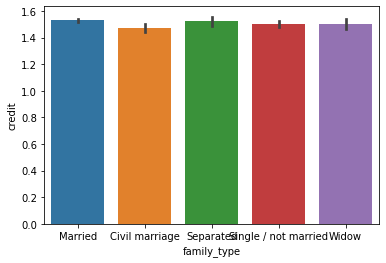

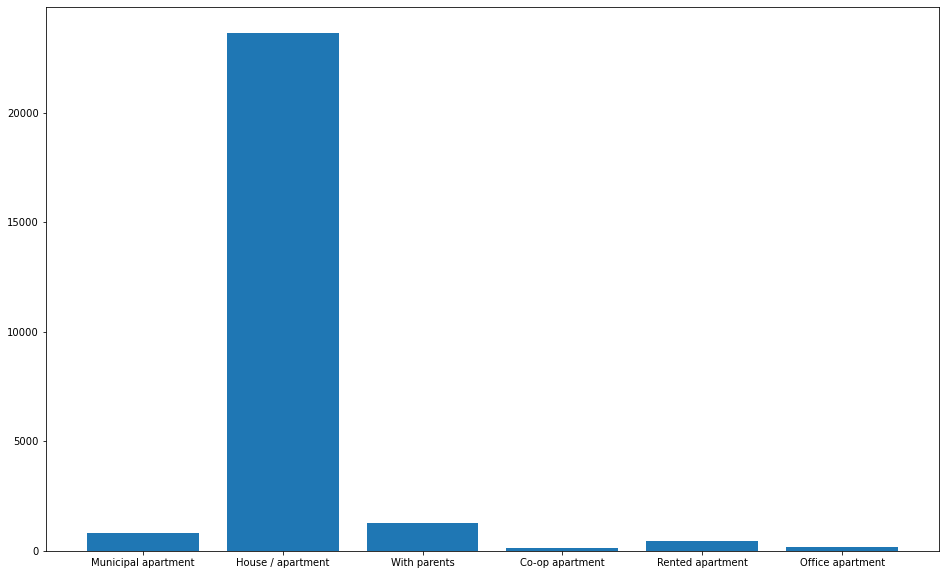

house_type           credit
Co-op apartment      0.0          14
                     1.0          30
                     2.0          66
House / apartment    0.0        2873
                     1.0        5569
                     2.0       15211
Municipal apartment  0.0         110
                     1.0         160
                     2.0         548
Office apartment     0.0          24
                     1.0          48
                     2.0         118
Rented apartment     0.0          50
                     1.0         147
                     2.0         232
With parents         0.0         151
                     1.0         313
                     2.0         793
Name: credit, dtype: int64
credit:1.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  19%
credit:2.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  66%
credit:0.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  13%
credit:1.0에서 house_type:House / apartment 인 값의 퍼센테이지 ->  23%
credit:2.0에서 house_type:House

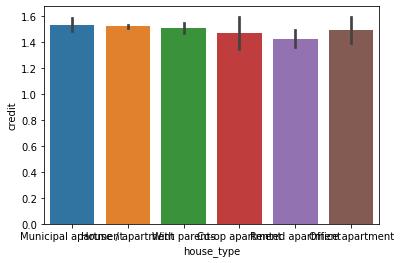

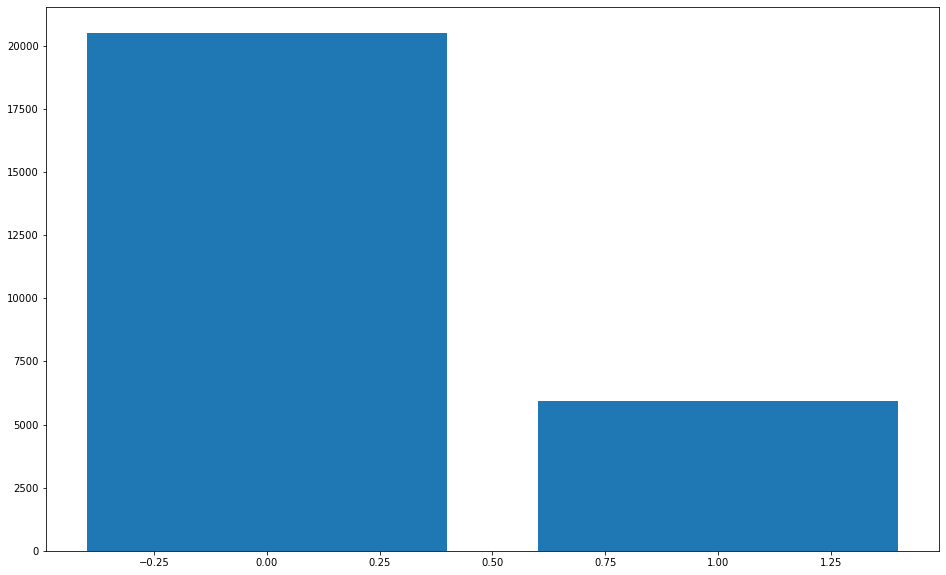

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64
credit:1.0에서 work_phone:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:0 인 값의 퍼센테이지 ->  64%
credit:0.0에서 work_phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 work_phone:1 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:1 인 값의 퍼센테이지 ->  63%
credit:0.0에서 work_phone:1 인 값의 퍼센테이지 ->  12%



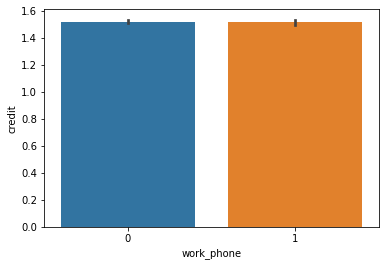

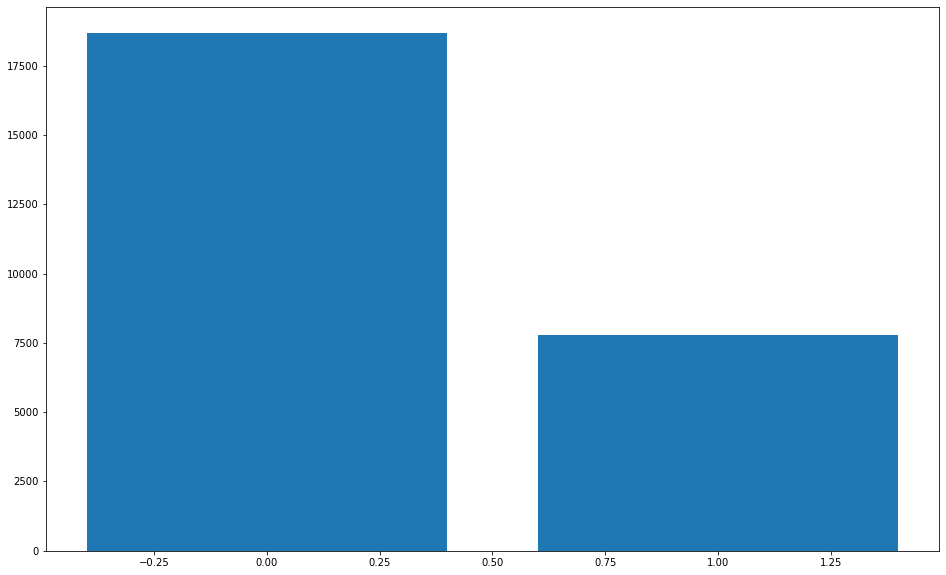

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64
credit:1.0에서 phone:0 인 값의 퍼센테이지 ->  24%
credit:2.0에서 phone:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 phone:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 phone:1 인 값의 퍼센테이지 ->  64%
credit:0.0에서 phone:1 인 값의 퍼센테이지 ->  12%



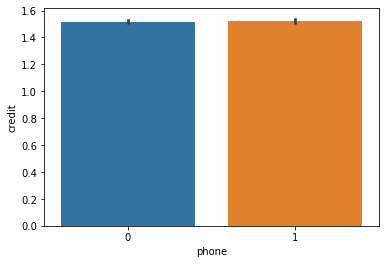

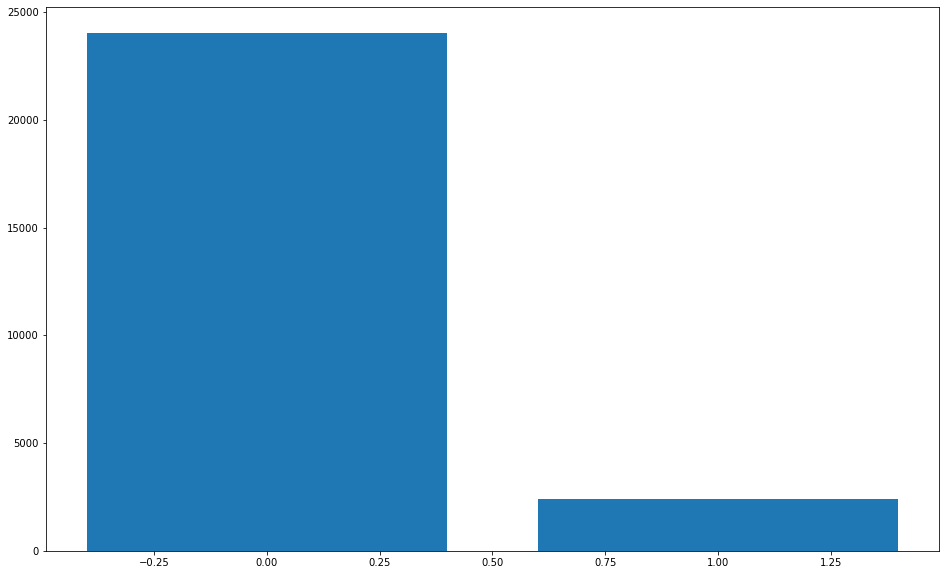

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64
credit:1.0에서 email:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 email:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 email:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 email:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 email:1 인 값의 퍼센테이지 ->  66%
credit:0.0에서 email:1 인 값의 퍼센테이지 ->  11%



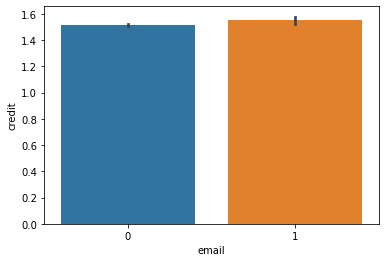

In [36]:
categorical_feature=['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email']

for cf in categorical_feature:
    bargraph(cf)
    creditbar(cf)
    print()
    

### 결과 분석 및 도출

 1) gender
    
    - F가 M보다 약 2배 표본이 많고 각 feature에서 credit 0<1<2 순으로 많다. 분포는 남녀 여부에 차이를 보이지 않으므로, 남녀 여부로 인해 credit에 영향을 끼치지 않는것으로 판단함
 
 2) car 
    
    - N이 Y보다 약 2배 표본이 많고 각 feature에서 credit 0<1<2 순으로 많다. 분포는 차 보유 여부에 거의 차이를 보이지 않으나 N의 1이 Y의 1보다 약 2%높음. 차 보유 여부로 인해 credit에 영향을 많이 끼치지 않는것으로 판단함
    
 3) reality
    
    - Y가 N보다 약 2배 표본이 많고 각 feature에서 credit 0<1<2 순으로 많다. 분포는 reality 여부에 거의 차이를 보이지 않으나 Y의 1이 N의 1보다 약 2% 높음. reallity로 인해 credit에 영향을 많이 끼치지 않는것으로 판단함
    
 4) income_type
    
    - working이 가장 많으며 student의 표본은 거의 없다.feature에서 credit이 대체적으로 0<1<2순으로 많다. student에서는 credit 0이 거의 없으며, 1이 40%, 2가 60%차지한다. 이로 인해 student일 경우 1 혹은 2일 가능성이 높으나 상대적으로 표본이 적어 부정확하다.
    
 5) edu_type
    
    - Secondary / secondary special의 표본이 가장 많으며 Academical degree는 거의 없다. credit의 분포는 0<1<2순으로 많으며 모든 edu_tyoe에서 비슷한 분포를 보인다.
    
 6) family_type
    
    - married의 표본이 가장 많으며 credit의 분포는 0<1<2순으로 많으며 모든 family_type에서 비슷한 분포를 보인다.
    
 7) house_type
    
    - house/ apartment의 표본이 가장 많다. credit의 분포는 0<1<2순으로 많으며 모든 house_type에서 비슷한 분포를 보인나 rented apartmet는 다른feature 보다 1이 약 7%이상 높고 2가 7% 낮다. rented apartment는 상대적으로 1의 비율이 더 높다.
    
 8) work_phone
    
    - 0의 표본이 약 3.5배 가량 많으며  credit의 분포는 0<1<2순으로 많으며 0,1 에서 비슷한 분포를 보인다.
     
 9) phone
    
    - 0의 표본이 약 10배 가량 많으며  credit의 분포는 0<1<2순으로 많으며 0,1 에서 비슷한 분포를 보인다.
     
 10) e-mail
    
    - 0의 표본이 약 10배 가량 많으며  credit의 분포는 0<1<2순으로 많으며 0,1 에서 비슷한 분포를 보인다.

### 수치형 데이터 시각화 및 분석

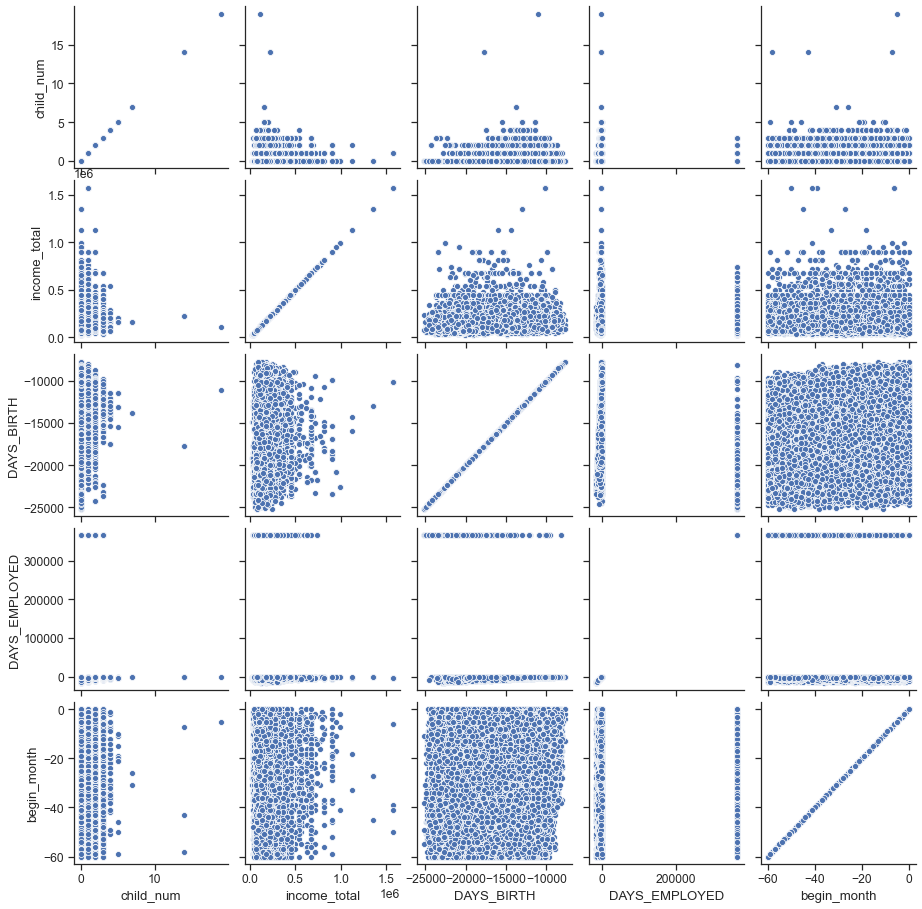

In [37]:
# 수치형 변수에 대한 상관관계 분석

sns.set(font_scale=1.1) ## 폰트사이즈 조절
sns.set_style('ticks') ## 축 눈금 표시
data = Ptrain[[ 'child_num', 'income_total','DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
sns.pairplot(data,
             diag_kind=None)
plt.show()

### 결과 분석 및 도출

- 수치형 feature 각각에서 양이나 음의 상관관계를 나타내는 것은 없다.

- child_num이 10명 이상이면 days_employed, income_total이 저조하다.

### 1-5) 이상치 도출

- 수치형 데이터에 대해 boxplot을 사용하여 이상치 도출

In [38]:
num_feature=[ 'child_num', 'income_total','DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

def credit_box(feature):
    plt.boxplot(Ptrain[feature])
    plt.show()

child_num


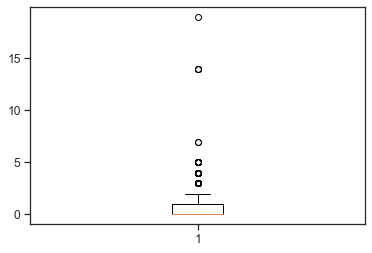

income_total


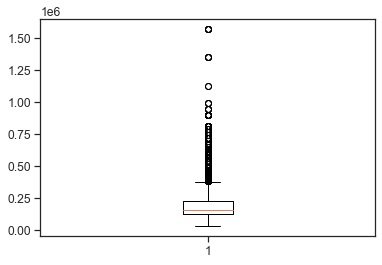

DAYS_BIRTH


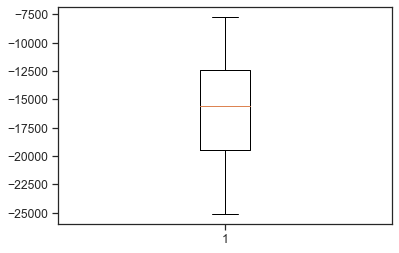

DAYS_EMPLOYED


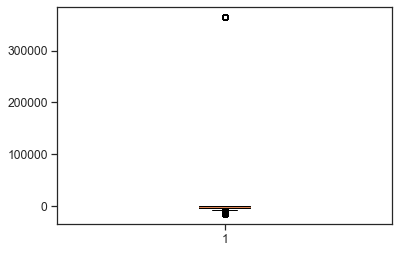

begin_month


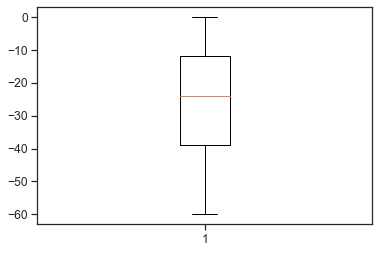

In [39]:
for feature in num_feature:
    print(feature)
    credit_box(feature)

## 테스트 데이터 확인

In [40]:
Ptest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [41]:
# view unique value of each columns to find 
for column in Ptest.columns.unique():
    print(column,'\n', Ptest[column].unique())

index 
 [26457 26458 26459 ... 36454 36455 36456]
gender 
 ['M' 'F']
car 
 ['Y' 'N']
reality 
 ['N' 'Y']
child_num 
 [0 1 2 3 5 4]
income_total 
 [ 112500.   135000.    69372.   225000.   126000.   585000.   141750.
  130500.    90000.   144000.   202500.   180000.   315000.   270000.
  229500.   166500.   157500.   207000.   171000.   108000.    49500.
  238500.   391500.   427500.   139500.   360000.   765000.   189000.
  122400.    72000.   148500.    67500.   261000.   162000.   193500.
  247500.    99000.   288000.    81000.   333000.   450000.   121500.
  292500.   159750.   103500.   495000.    58500.   900000.    29250.
  351000.   310500.   117000.   185400.   382500.    63000.    54000.
  211500.   337500.   140850.   369000.    94500.   607500.    40500.
   76500.    30150.   378000.   256500.   243000.   153000.   115200.
  360450.   265500.   198000.   675000.   720000.    90900.   324000.
   45000.   405000.   612000.    73575.   184500.   306000.   216000.
  297000.    6

# 2. 데이터 가공하기

In [42]:
# 복사본을 만들어 복사본을 target과 feature로 나눈다.
c_train=Ptrain.copy()
c_target=c_train['credit']

print(c_train.shape)
print(c_target.shape)

(26457, 20)
(26457,)


### 2-1) 중복 데이터 확인 및 파생변수 생성

 - 동일인이 신용카드를 2개 이상 발급 받을 경우 중복 데이터 생성.
 - credit_num으로 발급한 신용카드 갯수 저장
 - -1인 경우 이미 중복 데이터이므로 삭제

In [41]:
# 중복 데이터 확인
# credit_num 변수 생성하여 몇개의 중복데이터가 있는지 저장
# credit_num으로 몇개의 신용카드를 만들었는지 확인 가능

def find_multidata(data):
    data=data.drop(['index'],axis=1)
    ch=[0]*len(data)
    
    for i in range(len(data)):
        total=1
        for j in range(i+1,len(data)):
            if list(data.iloc[i])==list(data.iloc[j]) and ch[j]==0:
                ch[j]=-1
                total+=1
        if ch[i]==0:
            ch[i]=total
    return ch


c_train['credit_num']=find_multidata(c_train)
c_train.head(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,credit_num
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1


In [42]:
# csv파일로 변환하여 저장

c_train.to_csv(PATH+'/train_creditnum_new.csv', index=False, encoding='cp949') 

In [43]:
c_train=pd.read_csv(PATH+'/train_creditnum_new.csv')

In [44]:
# 중복 데이터 수량

len(c_train[c_train['credit_num']==-1])

1634

In [45]:
c_train.groupby(['credit_num','credit'])['credit'].count()

credit_num  credit
-1          0.0         162
            1.0         334
            2.0        1138
 1          0.0        2911
            1.0        5625
            2.0       14766
 2          0.0         138
            1.0         284
            2.0         998
 3          0.0           9
            1.0          23
            2.0          58
 4          0.0           2
            2.0           8
 5          1.0           1
Name: credit, dtype: int64

In [46]:
# credit_num -1인 중복 행 삭제

c_train=c_train.drop(c_train[c_train['credit_num']==-1].index)
c_train.credit_num.unique()

array([1, 2, 3, 4, 5], dtype=int64)

### 2-2) 데이터 범주화 

 - DAYS_BIRTH, DAYS_EMPLOYED, begin_month의 음수값을 양수로 변환
 - DAYS_BIRTH 10년단위로 범주화
 - DAYS_EMPLOYED 년단위로 범주화 및 이상치(30000달 넘는것) 변경
 - begin_month 년단위로 범주화
 - income_total 단위 축소
 - child_num 이상치 변경
 - family_size 이상치 변경
 - occyp_type 결측치 변경

In [47]:
# 음수값을 양수값으로 변환

def toplus(data):
    features=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
    for feature in features:
        data[feature]=-data[feature]
        
toplus(c_train)

### 2-2-1) DAYS_BIRTH

In [48]:
# 일로 된 나이를 년단위로 변환

c_train['DAYS_BIRTH']=c_train['DAYS_BIRTH']//365

In [49]:
# 나이 10년단위로 범주화

def age_categorize(age):
    name=''
    if age<10:
        name='0s'
    elif age<20:
        name='10s'
    elif age<30:
        name='20s'
    elif age<40:
        name='30s'
    elif age<50:
        name='40s'
    elif age<60:
        name='50s'
    elif age<70:
        name='60s'
    else:
        name='over70s'
    
    return name

In [50]:
# 범주화 c_train에 적용

c_train['DAYS_BIRTH']=c_train['DAYS_BIRTH'].apply(lambda x: age_categorize(x))

In [51]:
# 범주화된 데이터 확인

c_train['DAYS_BIRTH'].unique()

array(['30s', '50s', '40s', '20s', '60s'], dtype=object)

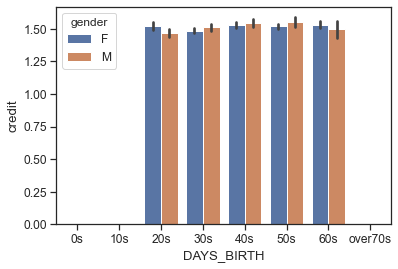

In [52]:
group_names=['0s','10s','20s','30s','40s','50s','60s','over70s']
sns.barplot(x='DAYS_BIRTH',y='credit',hue='gender',data=c_train,order=group_names)

### 2-2-2) DAYS_EMPLOYED

In [53]:
# 일로 된 경력을 년단위로 변환

c_train['DAYS_EMPLOYED']=c_train['DAYS_EMPLOYED']//365

In [54]:
# 음수인 값은 결측치이다(초기 36000이상의 값)

print('결측치 갯수:',len(c_train[c_train['DAYS_EMPLOYED']<0]))
print('결측치 퍼센트:',len(c_train[c_train['DAYS_EMPLOYED']<0])*100/len(c_train))

결측치 갯수: 4167
결측치 퍼센트: 16.786850904403174


In [55]:
# DAYS_EMPLOYED가 음수인 데이터는 연금 수령자(pesioner)과 occyp_type이 nan 이다.

c_train[c_train['DAYS_EMPLOYED']==-1001]
print(c_train.groupby(['DAYS_EMPLOYED','DAYS_BIRTH'])['DAYS_BIRTH'].count())

DAYS_EMPLOYED  DAYS_BIRTH
-1001          20s             15
               30s             26
               40s            123
               50s           1868
               60s           2135
                             ... 
 40            60s             12
 41            50s              2
               60s             13
 42            60s              2
 43            60s              1
Name: DAYS_BIRTH, Length: 149, dtype: int64


In [56]:
a=c_train[c_train['DAYS_EMPLOYED']==-1001]
for i in a.columns.unique():
    print(i,a[i].unique())

index [   14    18    21 ... 26439 26441 26443]
gender ['F' 'M']
car ['N' 'Y']
reality ['Y' 'N']
child_num [0 1 2 3]
income_total [157500.  216000.  202500.  135000.   99000.   54000.  144000.  360000.
 112500.  180000.   79650.   81000.   90000.  153000.  155250.  495000.
 189000.  126000.  121500.   67500.   94500.   76500.  301500.  247500.
 225000.  270000.   31500.   29250.   72000.  108000.   45000.   49500.
  65250.  427500.   40500.  175500.  162000.  211500.  103500.  292500.
 117000.  148500.   58500.  198000.  193500.  315000.   56250.  171000.
  92250.   50850.  130500.  184500.  185400.  450000.   47250.  243000.
  37800.  139500.  252000.  131400.  382500.   56700.   33750.  114750.
  85500.  166500.   33300.  288000.  115290.   38025.  167400.  101250.
 143100.  208350.  220500.   30150.  540000.   36900.  265500.  630000.
 113400.   38250.  742500.  517500.  207000.   63000.  206100.  337500.
 333000.  274500.   67050.  121900.5  31531.5  83250.  279000.  249750.
 28350

In [57]:
c_train['DAYS_EMPLOYED']=c_train['DAYS_EMPLOYED'].replace(-1001,45)

In [58]:
c_train['DAYS_EMPLOYED'].unique()

array([12,  4,  5, 13, 14,  3,  6,  0, 45, 11,  2, 16,  1, 10,  9,  8, 25,
        7, 15, 33, 23, 27, 17, 32, 20, 30, 22, 21, 18, 19, 29, 31, 24, 26,
       28, 36, 41, 34, 35, 40, 39, 37, 42, 43, 38], dtype=int64)

### 2-2-3) begin_month

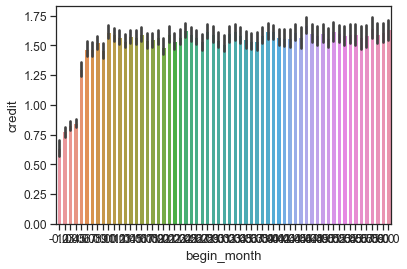

In [59]:
sns.barplot(x='begin_month',y='credit',data=c_train)

In [60]:
c_train['begin_month']=c_train['begin_month'].replace(-0,0)

In [61]:
c_train['begin_month'].unique()

array([ 6.,  5., 22., 37., 26., 18., 41., 53., 38., 40., 51., 60.,  2.,
       14.,  7., 35.,  4., 13., 57., 47., 33., 30., 20.,  8., 39., 21.,
       19., 24., 48., 12., 10., 42., 29.,  3., 23., 25.,  1., 15., 32.,
       59., 54., 34.,  0., 27., 45., 56., 46.,  9., 44., 36., 43., 49.,
       11., 55., 58., 28., 52., 17., 50., 16., 31.])

### 2-2-4) income_total

In [62]:
# income total 단위 변경

c_train['income_total']=round(c_train['income_total']/10000)

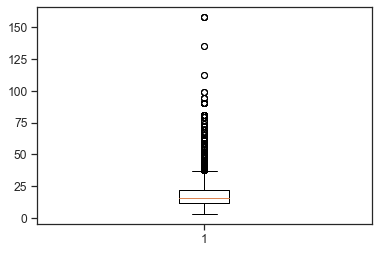

In [63]:
plt.boxplot(c_train['income_total'])
plt.show()

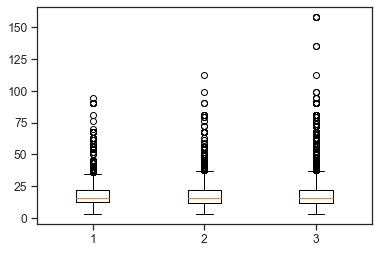

In [64]:
# credit 별 income_total 이상치 확인

c_0=list(c_train[c_train['credit']==0]['income_total'])
c_1=list(c_train[c_train['credit']==1]['income_total'])
c_2=list(c_train[c_train['credit']==2]['income_total'])
d2_income=[c_0,c_1,c_2]
plt.boxplot(d2_income)
plt.show()

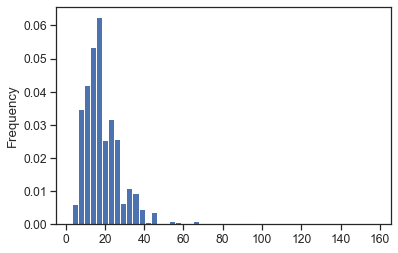

In [65]:
c_train['income_total'].plot(kind='hist',bins=50,density=True)

In [66]:
# 4분위 구하기
def percentile(data):
    min = np.percentile(data,0)      # 최소값
    q1 = np.percentile(data,25)      # 1사분위수
    q2 = np.percentile(data,50)      # 2사분위수
    q3 = np.percentile(data,75)      # 3사분위수
    iqr=q3-q1
    max = np.percentile(data,100)  # 최대값
    max_iqr=q3+1.5*iqr
    min_iqr=q1-1.5*iqr
    print('min:{} \nq1:{} \nq2:{} \nq3:{} \nmax:{} \niqr:{} \nmax_iqr:{} \nmin_iqr:{}'.format(min,q1,q2,q3,max,iqr,max_iqr,min_iqr))
        


for credit in d2_income:
    percentile(credit)
    print('-------------------------------------')

min:3.0 
q1:13.0 
q2:16.0 
q3:22.0 
max:94.0 
iqr:9.0 
max_iqr:35.5 
min_iqr:-0.5
-------------------------------------
min:3.0 
q1:12.0 
q2:16.0 
q3:22.0 
max:112.0 
iqr:10.0 
max_iqr:37.0 
min_iqr:-3.0
-------------------------------------
min:3.0 
q1:12.0 
q2:16.0 
q3:22.0 
max:158.0 
iqr:10.0 
max_iqr:37.0 
min_iqr:-3.0
-------------------------------------


In [67]:
# 이상치 

a=c_train['income_total']>41.5
b=c_train['credit']==0
print('credit 0의 이상치 갯수:',len(c_train[a&b]))
print('이상치 percentage:',len(c_train[a&b])*100/len(c_train[b]))


print('--------------------------------------------------------')

a=c_train['income_total']>35.5
b=c_train['credit']==1
print('credit 1의 이상치 갯수:',len(c_train[a&b]))
print('이상치 percentage:',len(c_train[a&b])*100/len(c_train[b]))


print('--------------------------------------------------------')

a=c_train['income_total']>34
b=c_train['credit']==2
print('credit 2의 이상치 갯수:',len(c_train[a&b]))
print('이상치 percentage:',len(c_train[a&b])*100/len(c_train[b]))


credit 0의 이상치 갯수: 89
이상치 percentage: 2.9084967320261437
--------------------------------------------------------
credit 1의 이상치 갯수: 313
이상치 percentage: 5.275577279622451
--------------------------------------------------------
credit 2의 이상치 갯수: 1056
이상치 percentage: 6.670878079595704


In [68]:
# income_total 소득단위로 범주화(누적 4,11,23,40,60,77,88,96,100%)

def income_categorize(income):
    name=''
    if income<8:
        name='9등급'
    elif income<10:
        name='8등급'
    elif income<13:
        name='7등급'
    elif income<16:
        name='6등급'
    elif income<20:
        name='5등급'
    elif income<24:
        name='4등급'
    elif income<32:
        name='3등급'
    elif income<40:
        name='2등급'
    else:
        name='1등급'
    
    return name

In [69]:
c_train['income_total']=c_train['income_total'].apply(lambda x: income_categorize(x))

### 2-2-5) child_num

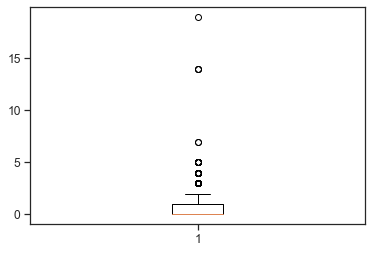

In [70]:
plt.boxplot(c_train['child_num'])
plt.show()

In [71]:
# 3이상 부터 이상치 임을 확인
# 이상치 percentage확인

len(c_train[c_train['child_num']>2])*100/len(c_train)

1.4019256334850743

In [72]:
# 2명 초과면 2로 변경 함(이상치 처리)

for i in c_train['child_num'].unique():
    if i>2:
        c_train['child_num']=c_train['child_num'].replace(i,2)

In [73]:
c_train['child_num'].unique()

array([0, 1, 2], dtype=int64)

### 2-2-6) occyp_type

- 결측치를 Unknown으로 변환

In [74]:
c_train['occyp_type'].fillna('Unknown',inplace=True)

In [75]:
print(c_train['occyp_type'].unique())

['Unknown' 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


### 2-2-7) family_size

- 이상치를 평균값으로 변환

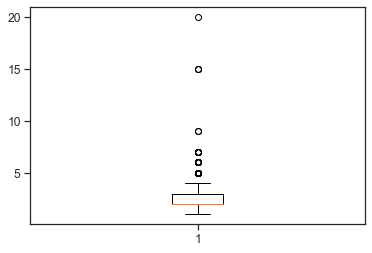

In [76]:
plt.boxplot(c_train['family_size'])
plt.show()

In [77]:
# 4명 초과면 4로 변경 함(이상치 처리)

for i in c_train['family_size'].unique():
    if i>4:
        c_train['family_size']=c_train['family_size'].replace(i,4)

In [78]:
c_train['family_size'].unique()

array([2., 3., 4., 1.])

### 2-3) label-encoding, one-hot-encoding

 - 순서형데이터 혹은 2개 뿐인 binary data -> label-encoding
 - 명목형 data -> one-hot-encoding
 - gender,car,reality,income_total,edu_type -> label-encoding
 - income_type,house_type -> one-hot-encoding

In [79]:
# label-encoding

def encode_features(data):
    features=['gender', 'car', 'reality', 'edu_type','income_total','DAYS_BIRTH',]
    for feature in features:
        le=LabelEncoder()
        le=le.fit(data[feature])
        data[feature]=le.transform(data[feature])
        
    return data

c_train=encode_features(c_train)
c_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,credit_num
0,0,0,0,0,0,3,Commercial associate,1,Married,Municipal apartment,...,12,1,0,0,0,Unknown,2.0,6.0,1.0,1
1,1,0,0,1,1,2,Commercial associate,4,Civil marriage,House / apartment,...,4,1,0,0,1,Laborers,3.0,5.0,1.0,1
2,2,1,1,1,0,0,Working,1,Married,House / apartment,...,12,1,0,1,0,Managers,2.0,22.0,2.0,1
3,3,0,0,1,0,3,Commercial associate,4,Married,House / apartment,...,5,1,0,1,0,Sales staff,2.0,37.0,0.0,1
4,4,0,1,1,0,4,State servant,1,Married,House / apartment,...,5,1,0,0,0,Managers,2.0,26.0,2.0,1


In [80]:
ohe_train=c_train


features=['income_type','house_type','family_type','occyp_type']

for feature in features:
    col_ohe=pd.get_dummies(c_train[feature],prefix=feature)
    c_train=pd.concat((c_train,col_ohe),axis=1).drop(feature,axis=1)

In [81]:
c_train.head()

,index,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
0,0,0,0,0,0,3,1,1,12,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,1,2,4,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,1,3,12,1,...,0,1,0,0,0,0,0,0,0,0
3,3,0,0,1,0,3,4,2,5,1,...,0,0,0,0,0,1,0,0,0,0
4,4,0,1,1,0,4,1,2,5,1,...,0,1,0,0,0,0,0,0,0,0


In [82]:
c_train.corr()

,index,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
index,1.000000,-0.006394,0.003653,0.005266,0.005065,-0.002890,-0.003041,0.008983,0.003241,NaN,...,-0.008883,0.006219,0.002196,-0.002895,0.000255,0.003646,-0.003249,-0.003009,-0.002361,0.008669
gender,-0.006394,1.000000,0.362043,-0.050187,0.078876,-0.233153,0.004726,-0.198329,-0.206895,NaN,...,0.074229,0.090183,-0.115500,-0.052158,-0.021658,-0.135778,-0.039221,0.108067,-0.153224,-0.021276
car,0.003653,0.362043,1.000000,-0.014871,0.103301,-0.233277,-0.105071,-0.151710,-0.173332,NaN,...,-0.019122,0.119500,-0.040670,-0.013778,-0.008615,-0.028168,-0.025237,-0.009516,-0.122970,-0.032322
reality,0.005266,-0.050187,-0.014871,1.000000,-0.000890,-0.034861,0.009224,0.120478,0.090043,NaN,...,-0.004252,0.008285,-0.012670,0.016239,0.012416,-0.012367,0.001068,-0.009159,0.050934,0.013254
child_num,0.005065,0.078876,0.103301,-0.000890,1.000000,-0.037866,-0.058550,-0.342162,-0.250429,NaN,...,-0.000348,0.046707,0.002822,0.009395,0.012557,0.050625,0.007098,-0.012621,-0.174154,-0.002296
income_total,-0.002890,-0.233153,-0.233277,-0.034861,-0.037866,1.000000,0.227016,0.105056,0.181241,NaN,...,0.044577,-0.241274,0.041664,-0.022292,-0.034867,0.035280,0.018064,0.007443,0.151999,0.013116
edu_type,-0.003041,0.004726,-0.105071,0.009224,-0.058550,0.227016,1.000000,0.158485,0.123665,NaN,...,0.034441,-0.198505,0.061542,0.014283,0.026367,0.035889,-0.032786,0.042611,0.040639,0.022964
DAYS_BIRTH,0.008983,-0.198329,-0.151710,0.120478,-0.342162,0.105056,0.158485,1.000000,0.650188,NaN,...,-0.011013,-0.047021,-0.007614,-0.018758,-0.013936,-0.145642,-0.010464,0.017381,0.405299,-0.036462
DAYS_EMPLOYED,0.003241,-0.206895,-0.173332,0.090043,-0.250429,0.181241,0.123665,0.650188,1.000000,NaN,...,-0.034185,-0.115241,-0.023899,-0.033349,-0.018679,-0.179888,-0.027350,-0.071643,0.632027,-0.041224
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
c_train.credit

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 24823, dtype: float64

In [84]:
# 의미없는 feature인 FLAG_MOBILE과 occyp_type 제거

c_target=c_train['credit']
c_train=c_train.drop(["FLAG_MOBIL",'credit','index'],axis=1)

c_target=c_target.reset_index(drop=True)
c_train=c_train.reset_index(drop=True)
print('train set shape:',c_train.shape)
print('target set shape:',c_target.shape)

train set shape: (24823, 49)
target set shape: (24823,)


# 3. MODELING

### test set 만들기

In [85]:
c_test=Ptest.copy()
c_test.shape

(10000, 19)

In [140]:
def n_find_multidata(data):
    data=data.drop(['index'],axis=1)
    ch=[0]*len(data)
    
    for i in range(len(data)):
        total=0
        for j in range(len(data)):
            if list(data.iloc[i])==list(data.iloc[j]):
                total+=1
        ch[i]=total
    return ch

In [141]:
c_test['credit_num']=n_find_multidata(c_test)

In [142]:
c_test.to_csv(PATH+'/new_test_creditnum.csv', index=False, encoding='cp949') 

In [87]:
c_test=pd.read_csv(PATH+'/new_test_creditnum.csv')

In [88]:
c_test=c_test[c_test['credit_num']!=-1]

toplus(c_test)
c_test['DAYS_BIRTH']=c_test['DAYS_BIRTH']//365
c_test['DAYS_BIRTH']=c_test['DAYS_BIRTH'].apply(lambda x: age_categorize(x))

c_test['DAYS_EMPLOYED']=c_test['DAYS_EMPLOYED']//365
c_test['DAYS_EMPLOYED']=c_test['DAYS_EMPLOYED'].replace(-1001,45)

        
c_test['begin_month']=c_test['begin_month'].replace(-0.0)

c_test['income_total']=round(c_test['income_total']/10000)
c_test['income_total']=c_test['income_total'].apply(lambda x: income_categorize(x))


for i in c_test['child_num'].unique():
    if i>2:
        c_test['child_num']=c_test['child_num'].replace(i,2)
        
for i in c_test['family_size'].unique():
    if i>4:
        c_test['family_size']=c_test['family_size'].replace(i,4)
        
c_test['occyp_type'].fillna('Unknown',inplace=True)

In [89]:
features=['income_type','house_type','family_type','occyp_type']

c_test=encode_features(c_test)

for feature in features:
    col_ohe=pd.get_dummies(c_test[feature],prefix=feature)
    c_test=pd.concat((c_test,col_ohe),axis=1).drop(feature,axis=1)
    
c_test=c_test.drop(["FLAG_MOBIL","index"],axis=1)

print('test shape:',c_test.shape)

test shape: (10000, 49)


In [90]:
c_test

,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
0,1,1,0,0,6,4,4,45,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,5,1,3,23,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,8,4,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,6,4,3,6,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,3,1,2,25,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,3,2,3,14,1,1,...,0,0,0,0,0,0,0,0,0,0
9996,1,1,1,0,3,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,1,0,2,4,3,38,0,0,...,0,0,1,0,0,0,0,0,0,0
9998,0,1,0,0,4,4,2,2,0,1,...,0,0,0,0,0,0,0,0,1,0


In [91]:
c_target

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
24818    1.0
24819    2.0
24820    2.0
24821    2.0
24822    2.0
Name: credit, Length: 24823, dtype: float64

### 3-1) SVM

In [92]:
# validation, test set 나누기(데이터 분할)

trainX, testX, trainY, testY = train_test_split(c_train, c_target, test_size=0.2)

In [465]:
# 알맞는 parameter 찾기 (GRID SEARCH)

# 1. 원하는 파라미터를 딕셔너리 형태로 생성
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

# 2. 객체생성
grid_search=GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,return_train_score=True)

# 3.
grid_search.fit(trainX,trainY)

# 4. 모델 평가
print('test set score: {}'.format(grid_search.score(testX,testY)))

# 5. 최적의 파라미터 찾기
print('best parameters: {}'.format(grid_search.best_params_))
print('best score: {}'.format(grid_search.best_score_))

test set score: 0.6789526686807653
best parameters: {'C': 1, 'gamma': 0.01}
best score: 0.6891430773409333


In [98]:
def cross_validation(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((c_test.shape[0], 3))
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(c_train,c_target)):
        X_train, X_test=c_train.iloc[train_index],c_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)
        sub+=how.predict_proba(c_test)
    print("MEAN logloss:{}".format(np.mean(outcomes)))
        
    return sub/folds.n_splits

In [534]:
def best_params(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(c_train,c_target)):
        X_train, X_test=c_train.iloc[train_index],c_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        outcomes.append(logloss)
    print("MEAN logloss:{}".format(np.mean(outcomes)))
        
    return np.mean(outcomes)

In [148]:
svm=cross_validation(SVC(kernel='rbf',C=10,gamma=0.01, probability=True))

Psub.loc[:,1:]=svm
Psub.to_csv(PATH+'/svm_submission.csv',index=False)

KeyboardInterrupt: 

### 3-2) GaussianNB

In [149]:
nb=cross_validation(GaussianNB())

Psub.loc[:,1:]=nb
Psub.to_csv(PATH+'/new_nb_submission.csv',index=False)

FOLD 0 : logloss:2.492035492411465
FOLD 1 : logloss:2.447945550876927
FOLD 2 : logloss:3.131920643379887
FOLD 3 : logloss:2.882842299111582
FOLD 4 : logloss:3.1630409735871314
MEAN logloss:2.8235569918733985


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-3) KNN

In [546]:
score=1
params=[0]
for i in range(100,3000,100):
    tmp=best_params(KNeighborsClassifier(n_neighbors=i))
    if tmp<score:
        score=tmp
        parmas=[i]
print(score, parmas)

MEAN logloss:0.8298626166995053
MEAN logloss:0.8277800317497448
MEAN logloss:0.8293369019086576
MEAN logloss:0.8309926902916775
MEAN logloss:0.8328953724026666
MEAN logloss:0.8343681975155972
MEAN logloss:0.8360238840423957
MEAN logloss:0.8377689844965651
MEAN logloss:0.8390833433058289
MEAN logloss:0.8402071982805508
MEAN logloss:0.8413345335895859
MEAN logloss:0.8424411509751474
MEAN logloss:0.8435275716776754
MEAN logloss:0.84448675325099
MEAN logloss:0.8454617175122541
MEAN logloss:0.8465073491412103
MEAN logloss:0.8474363645280153
MEAN logloss:0.8482979847014652
MEAN logloss:0.8489971438455068
MEAN logloss:0.8497370734726379
MEAN logloss:0.8503631087446001
MEAN logloss:0.8510578865953189
MEAN logloss:0.8517305118195638
MEAN logloss:0.8523575753849604
MEAN logloss:0.8530852386913
MEAN logloss:0.8537990120191334
MEAN logloss:0.8544115279353885
MEAN logloss:0.8549326930043838
MEAN logloss:0.8554953863651635
0.8277800317497448 [200]


In [150]:
knn=cross_validation(KNeighborsClassifier(n_neighbors=150))

Psub.loc[:,1:]=knn
Psub.to_csv(PATH+'/new_knn_submission.csv',index=False)

FOLD 0 : logloss:0.8223692084523253
FOLD 1 : logloss:0.8255949859827227
FOLD 2 : logloss:0.8355449247148334
FOLD 3 : logloss:0.8287282506492991
FOLD 4 : logloss:0.82701704574717
MEAN logloss:0.8278508831092701


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-4) 로지스틱 회귀

In [151]:
lg=cross_validation(LogisticRegression(multi_class='multinomial',solver='lbfgs',C=20))

Psub.loc[:,1:]=lg
Psub.to_csv(PATH+'/new_lg_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.8691038108657692


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.8675805216227059


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.8683093213147304


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.8672393713297119
FOLD 4 : logloss:0.8678155201310658
MEAN logloss:0.8680097090527967


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-5 )랜덤포레스트

In [538]:
score=1
params=[0,0,0]
for i in range(1,6):
    for j in range(1,10):
        for k in range(1,50):
            tmp=best_params(RandomForestClassifier(n_estimators=i,max_depth=j,max_features=k))
            if tmp<score:
                score=tmp
                parmas=[i,j,k]
print(score, parmas)

MEAN logloss:0.8872123228907516
MEAN logloss:0.8871754306011704
MEAN logloss:0.8729056600732573
MEAN logloss:0.8871760320654541
MEAN logloss:0.8745931659253501
MEAN logloss:0.8872095604578487
MEAN logloss:0.8726246477549637
MEAN logloss:0.8731312297769142
MEAN logloss:0.8869323190165559
MEAN logloss:0.8727341333479931
MEAN logloss:0.8580824041620623
MEAN logloss:0.8734810089593312
MEAN logloss:0.8748087847500328
MEAN logloss:0.8583182188848142
MEAN logloss:0.8732073691266
MEAN logloss:0.8441131190553774
MEAN logloss:0.872537523148431
MEAN logloss:0.860813338341274
MEAN logloss:0.8731668630977285
MEAN logloss:0.8604674505658835
MEAN logloss:0.8328300467805464
MEAN logloss:0.8591271171328098
MEAN logloss:0.8584463651670339
MEAN logloss:0.8605120609863943
MEAN logloss:0.8186384454507719
MEAN logloss:0.8584335974885733
MEAN logloss:0.8636299875382963
MEAN logloss:0.8723084099501041
MEAN logloss:0.8610611788087604
MEAN logloss:0.8324772353961196
MEAN logloss:0.8472007574426123
MEAN logloss:

MEAN logloss:0.8887694459761313
MEAN logloss:0.9094923498231067
MEAN logloss:0.8970993700417835
MEAN logloss:0.90052476430322
MEAN logloss:0.9050548524685122
MEAN logloss:0.9022044135746766
MEAN logloss:0.8878906240026746
MEAN logloss:0.9227564004156132
MEAN logloss:0.934954743645038
MEAN logloss:0.9095803629653071
MEAN logloss:0.9055539232649933
MEAN logloss:0.9147525932908132
MEAN logloss:0.9050194007490722
MEAN logloss:0.8974294387241153
MEAN logloss:0.9073699305709709
MEAN logloss:0.9014418852085406
MEAN logloss:0.8880486545768136
MEAN logloss:0.9232687954836951
MEAN logloss:0.9245240796724788
MEAN logloss:0.916717983522424
MEAN logloss:0.9144880473208131
MEAN logloss:0.8917281757065373
MEAN logloss:0.8929106948436634
MEAN logloss:0.9087880109172648
MEAN logloss:0.9501837438027361
MEAN logloss:0.9165339308722882
MEAN logloss:0.9207959493786266
MEAN logloss:0.9275615806811597
MEAN logloss:0.9153817595189391
MEAN logloss:0.9222413003962575
MEAN logloss:0.9325476847252171
MEAN logloss

MEAN logloss:0.8394093221649481
MEAN logloss:0.8183712150129232
MEAN logloss:0.825655324660729
MEAN logloss:0.819183615737033
MEAN logloss:0.8236661703854937
MEAN logloss:0.8282305907101195
MEAN logloss:0.8168893185807491
MEAN logloss:0.8203493823570482
MEAN logloss:0.8195739477117663
MEAN logloss:0.8176318264920125
MEAN logloss:0.8221689347303993
MEAN logloss:0.8162858683265579
MEAN logloss:0.8162539978588843
MEAN logloss:0.8166277996281931
MEAN logloss:0.8152588936173906
MEAN logloss:0.8154051941687609
MEAN logloss:0.8156375331272422
MEAN logloss:0.8158993533774026
MEAN logloss:0.8154682713107538
MEAN logloss:0.8148633490029658
MEAN logloss:0.815096704394757
MEAN logloss:0.8144700741868446
MEAN logloss:0.8150866425337375
MEAN logloss:0.8779081532756067
MEAN logloss:0.8780430888188206
MEAN logloss:0.8623768060710887
MEAN logloss:0.8547798878008328
MEAN logloss:0.8463425955505357
MEAN logloss:0.8619258021107937
MEAN logloss:0.8595384448690464
MEAN logloss:0.8555715575490505
MEAN loglos

MEAN logloss:0.8488405232508252
MEAN logloss:0.8547072048710543
MEAN logloss:0.850595515610865
MEAN logloss:0.8382085093921671
MEAN logloss:0.8393271118426746
MEAN logloss:0.8424502252944386
MEAN logloss:0.8415464261620491
MEAN logloss:0.840489256025854
MEAN logloss:0.8402944380900866
MEAN logloss:0.8465040397022872
MEAN logloss:0.8676821932238902
MEAN logloss:0.872354632317632
MEAN logloss:0.8587187418471304
MEAN logloss:0.8628379932808553
MEAN logloss:0.8388683995916842
MEAN logloss:0.864787137797071
MEAN logloss:0.8522369725664284
MEAN logloss:0.8405511489927419
MEAN logloss:0.8441916831651097
MEAN logloss:0.8446473219416166
MEAN logloss:0.859646335760462
MEAN logloss:0.8445518640302347
MEAN logloss:0.8489032683564159
MEAN logloss:0.8543225646155695
MEAN logloss:0.8511860877247812
MEAN logloss:0.8506768555847593
MEAN logloss:0.8525802920224054
MEAN logloss:0.8528262646865006
MEAN logloss:0.8572958763792885
MEAN logloss:0.8507632923421007
MEAN logloss:0.8505040097152307
MEAN logloss:

MEAN logloss:0.838068729662081
MEAN logloss:0.8476690310662478
MEAN logloss:0.83571026753678
MEAN logloss:0.8445686568947744
MEAN logloss:0.8377580727554585
MEAN logloss:0.8317014924615945
MEAN logloss:0.8273151802252094
MEAN logloss:0.8320837756152228
MEAN logloss:0.8333569816729016
MEAN logloss:0.8226334481731709
MEAN logloss:0.8231090358589137
MEAN logloss:0.8336480248229157
MEAN logloss:0.8207672697332308
MEAN logloss:0.8226800279630929
MEAN logloss:0.827033463376606
MEAN logloss:0.8220196975679983
MEAN logloss:0.8232918378892473
MEAN logloss:0.8182275725603072
MEAN logloss:0.8228286403548031
MEAN logloss:0.81537835854786
MEAN logloss:0.8163140378774992
MEAN logloss:0.8151168969318844
MEAN logloss:0.8159906776522352
MEAN logloss:0.8142332278472985
MEAN logloss:0.8159240648550897
MEAN logloss:0.8175505266378359
MEAN logloss:0.8160541772018057
MEAN logloss:0.814372686213976
MEAN logloss:0.8145026833971508
MEAN logloss:0.8155289935153635
MEAN logloss:0.8180398748608628
MEAN logloss:0.

MEAN logloss:0.8426117192372666
MEAN logloss:0.8252836257426249
MEAN logloss:0.8356392820029972
MEAN logloss:0.8351219706804933
MEAN logloss:0.8298576344365379
MEAN logloss:0.8281779401410594
MEAN logloss:0.8360531736368854
MEAN logloss:0.8333751890577622
MEAN logloss:0.8396112661024409
MEAN logloss:0.847120086940051
MEAN logloss:0.8435052690295632
MEAN logloss:0.8412042524308623
MEAN logloss:0.862972130322935
MEAN logloss:0.8461002738448604
MEAN logloss:0.842376358194687
MEAN logloss:0.8326859778313697
MEAN logloss:0.8414731363445724
MEAN logloss:0.8467386379035761
MEAN logloss:0.8478819024660117
MEAN logloss:0.8484686138020894
MEAN logloss:0.8560800401101263
MEAN logloss:0.8425861091676048
MEAN logloss:0.8430321639579297
MEAN logloss:0.8420813650630654
MEAN logloss:0.8503578927890656
MEAN logloss:0.8498312074669915
MEAN logloss:0.8488498129594966
MEAN logloss:0.8502237027665244
MEAN logloss:0.8399083247528714
MEAN logloss:0.8531696075627236
MEAN logloss:0.8524766919987083
MEAN loglos

MEAN logloss:0.814385831245211
MEAN logloss:0.8142949760504642
MEAN logloss:0.8145964082117514
MEAN logloss:0.8144867250896002
MEAN logloss:0.8155797076957649
MEAN logloss:0.8145118892550745
MEAN logloss:0.8140100074119075
MEAN logloss:0.8140748601211809
MEAN logloss:0.8149131715627499
MEAN logloss:0.8146853307965213
MEAN logloss:0.8143844228972894
MEAN logloss:0.8147981320288901
MEAN logloss:0.8153272095916918
MEAN logloss:0.8154812328144612
MEAN logloss:0.8152938441670639
MEAN logloss:0.8148462616009112
MEAN logloss:0.814407560558787
MEAN logloss:0.8153714220315882
MEAN logloss:0.8154209284701164
MEAN logloss:0.815593009569039
MEAN logloss:0.872566304245427
MEAN logloss:0.8649307448695043
MEAN logloss:0.8467554062820744
MEAN logloss:0.844658567300133
MEAN logloss:0.8426747776729572
MEAN logloss:0.8350278355508263
MEAN logloss:0.8411123924764677
MEAN logloss:0.8377728170159042
MEAN logloss:0.8238722781151662
MEAN logloss:0.8270737960029806
MEAN logloss:0.8241077505983936
MEAN logloss:

MEAN logloss:0.8289474292074603
MEAN logloss:0.8238553302056875
MEAN logloss:0.8199470064921345
MEAN logloss:0.8182106262592459
MEAN logloss:0.8200671159262949
MEAN logloss:0.8198188420030823
MEAN logloss:0.8201138285906676
MEAN logloss:0.8185458340690953
MEAN logloss:0.8822380750494165
MEAN logloss:0.8820184098403322
MEAN logloss:0.8747111612144106
MEAN logloss:0.8603172989219434
MEAN logloss:0.8781621857264795
MEAN logloss:0.8652233034088581
MEAN logloss:0.8698517494130187
MEAN logloss:0.8646669964906115
MEAN logloss:0.847707617607288
MEAN logloss:0.854013713310359
MEAN logloss:0.8578776997641745
MEAN logloss:0.8480688690972544
MEAN logloss:0.8456671260781439
MEAN logloss:0.8440183969391171
MEAN logloss:0.8425883714879477
MEAN logloss:0.8416923877656133
MEAN logloss:0.8334410041343616
MEAN logloss:0.8429608937413742
MEAN logloss:0.8356169574213735
MEAN logloss:0.8381178107611698
MEAN logloss:0.8314569847154252
MEAN logloss:0.8253859439346265
MEAN logloss:0.8242389397816094
MEAN loglo

MEAN logloss:0.8238494091545183
MEAN logloss:0.8294369825871838
MEAN logloss:0.8294129476712365
MEAN logloss:0.8217745175663254
MEAN logloss:0.8207336120523155
MEAN logloss:0.818736400923011
MEAN logloss:0.8203842777967459
MEAN logloss:0.8179093633546831
MEAN logloss:0.8161310721986765
MEAN logloss:0.8173505803138321
MEAN logloss:0.8179869632348445
MEAN logloss:0.8139295477824783
MEAN logloss:0.815474088750771
MEAN logloss:0.8163507644083279
MEAN logloss:0.8143054257822812
MEAN logloss:0.8138867408227041
MEAN logloss:0.8136358129729381
MEAN logloss:0.8133277046451409
MEAN logloss:0.8155831783371792
MEAN logloss:0.8147077080904431
MEAN logloss:0.8149635128483617
MEAN logloss:0.8136942276918054
MEAN logloss:0.8179906075612585
MEAN logloss:0.8177243325414935
MEAN logloss:0.8146495826120013
MEAN logloss:0.8147437317270704
MEAN logloss:0.816007620282984
MEAN logloss:0.8145528235471702
MEAN logloss:0.8146786599618376
MEAN logloss:0.8153425646698983
MEAN logloss:0.8142537881465113
MEAN loglos

In [539]:
rand_forest=cross_validation(RandomForestClassifier(n_estimators=5,max_depth=9,max_features=11))

Psub.loc[:,1:]=rand_forest
Psub.to_csv(PATH+'/new_rnd_forest_submission.csv',index=False)

FOLD 0 : logloss:0.8073982152926593
FOLD 1 : logloss:0.8046980784786014
FOLD 2 : logloss:0.8254823857882584
FOLD 3 : logloss:0.8135103709532913
FOLD 4 : logloss:0.8163396210667975
MEAN logloss:0.8134857343159215


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-6) XGboost

In [447]:
m

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [437]:
xg=cross_validation(XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3,objective='multi:softprob'))

FOLD 0 : logloss:0.8010288453444253
FOLD 1 : logloss:0.7958606368990583
FOLD 2 : logloss:0.8145856130099128
FOLD 3 : logloss:0.8009635380001725
FOLD 4 : logloss:0.8082802951314143
MEAN logloss:0.8041437856769967


### 3-7) lightGBM

In [438]:
lgb=cross_validation(lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))

FOLD 0 : logloss:0.8029635554490705
FOLD 1 : logloss:0.7945948392830359
FOLD 2 : logloss:0.8158391446811979
FOLD 3 : logloss:0.8015951777703467
FOLD 4 : logloss:0.8084463052167719
MEAN logloss:0.8046878044800845


### 3-7) voting ensemble

In [540]:
voting=cross_validation(VotingClassifier(
    estimators=[('lr',LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)),
                ('rf',RandomForestClassifier(n_estimators=5,max_depth=9,max_features=11)),
                ('knn',KNeighborsClassifier(n_neighbors=150))],
    voting='soft'))

Psub.loc[:,1:]=voting
Psub.to_csv(PATH+'/new_voting_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.8243800959185752


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.8253783188179706


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.8300952300671323


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.8256136431518826


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 4 : logloss:0.8284422826487577
MEAN logloss:0.8267819141208637


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  import sys


In [171]:
voting2=cross_validation(VotingClassifier(
    estimators=[('lr',LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)),
                ('svm',SVC(kernel='rbf',C=10,gamma=0.01, probability=True)),
                ('knn',KNeighborsClassifier(n_neighbors=150))],
    voting='soft'))

Psub.loc[:,1:]=voting2
Psub.to_csv(PATH+'/voting2_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.8244639497838262


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.8176063681455271


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.8217447365790566


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.8195519532553998


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 4 : logloss:0.8193273397300697
MEAN logloss:0.8205388694987759


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  import sys


# 4. PCA(차원 축소)

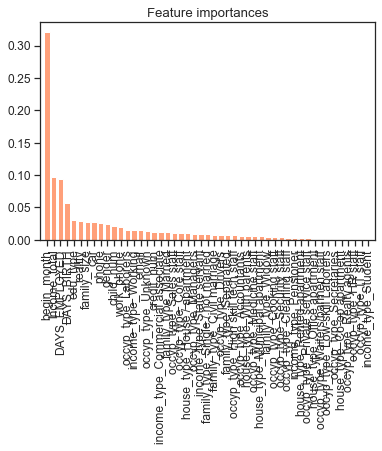

In [281]:
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(trainX, trainY)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(trainX.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(trainX.shape[1]), c_train.columns[indices], rotation=90)
plt.xlim([-1, trainX.shape[1]])
plt.show()

In [282]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(c_train, c_target)
lasso_feature=list(c_train.columns[np.where(lasso.coef_!=0)[0]])
print('Selected Features:',lasso_feature)

Selected Features: ['reality', 'edu_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'email', 'family_size', 'begin_month', 'credit_num', 'income_type_Commercial associate', 'family_type_Civil marriage', 'family_type_Married', 'occyp_type_Laborers']


In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(c_train, c_target)
lda_data=lda.transform(c_train)
DF_lda=pd.DataFrame(lda_data)
DF_lda['credit']=c_target


In [110]:
len(DF_lda)

24823

In [111]:
DF_lda

,0,1,credit
0,-0.586469,1.804341,1.0
1,-1.046559,1.220811,1.0
2,-0.013923,1.501635,2.0
3,0.897788,0.406901,0.0
4,-0.043382,1.139591,2.0
...,...,...,...
24818,-1.005493,1.413748,1.0
24819,0.849768,-0.615507,2.0
24820,-0.263293,1.724361,2.0
24821,1.128885,-0.997926,2.0


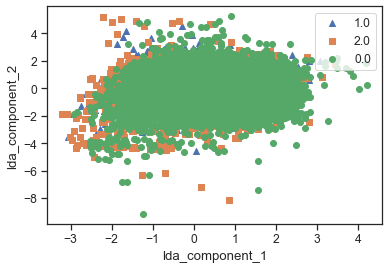

In [124]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = DF_lda[DF_lda['credit']==i][0]
    y_axis_data = DF_lda[DF_lda['credit']==i][1]

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=DF_lda['credit'].unique()[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [113]:
from sklearn.decomposition import KernelPCA

ipca = KernelPCA(n_components=20, kernel='rbf')
pca_train = ipca.fit_transform(c_train)
pca_train

array([[ 1.49623679e-01, -1.31734286e-01,  3.31324448e-02, ...,
         8.56414540e-02,  8.81668603e-02, -1.72757964e-02],
       [ 4.86011455e-01, -2.74468005e-01,  3.27739031e-01, ...,
         1.64303508e-01, -8.92982222e-03,  2.60870478e-03],
       [-6.44779191e-02,  1.45721929e-01, -7.13172332e-02, ...,
         1.36702622e-01,  2.78420392e-02, -1.00713350e-02],
       ...,
       [-2.03365836e-01,  4.88061721e-01,  1.79651579e-01, ...,
         7.24880927e-02, -3.09677778e-03,  2.21268509e-03],
       [-7.68582298e-02, -1.05914699e-01, -1.61432068e-01, ...,
        -5.81855111e-02, -2.19190076e-01,  4.14461449e-03],
       [ 5.07526748e-01, -9.79868408e-02,  1.56578452e-01, ...,
        -3.25724012e-01,  5.10889885e-02,  2.62922508e-04]])

In [428]:
df_pca_train.columns

RangeIndex(start=0, stop=20, step=1)

In [429]:
df_pca_train=pd.DataFrame(pca_train)

In [430]:
pc=pca.fit_transform(c_train)
pc_y = np.c_[pc,c_target]
df = pd.DataFrame(pc_y)

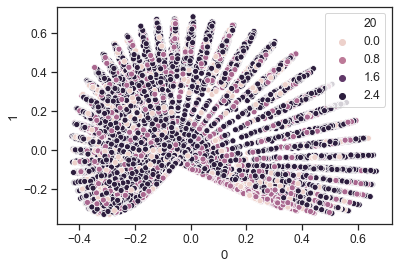

In [431]:
sns.scatterplot(data=df,x=0,y=1,hue=20)

In [312]:
len(df)

24823

In [212]:
df_pca_train=df_pca_train.drop(['credit'],axis=1)

In [227]:
df_pca_train['credit']=c_target
df_pca_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,credit
0,0.149624,-0.131734,0.033132,-0.102697,0.010520,0.334456,-0.183675,0.001962,-0.285948,-0.170579,...,-0.059643,-0.007736,-0.207864,0.059184,-0.120423,-0.005919,0.085641,0.088167,-0.017276,1.0
1,0.486011,-0.274468,0.327739,-0.108450,0.153005,-0.035778,-0.070763,-0.120803,-0.033240,-0.001098,...,0.013577,-0.015446,-0.027861,-0.058005,0.075368,0.072108,0.164304,-0.008930,0.002609,1.0
2,-0.064478,0.145722,-0.071317,-0.107022,0.051020,0.260698,-0.149487,-0.086785,0.179398,0.157445,...,0.040631,0.016046,0.098131,0.057416,-0.115292,0.020698,0.136703,0.027842,-0.010071,2.0
3,-0.405176,-0.163456,0.325099,0.394034,-0.292620,0.020346,0.000885,-0.045851,0.014888,-0.004725,...,0.211759,-0.045669,-0.026054,-0.090794,0.045878,0.109852,-0.017085,-0.000001,-0.006107,0.0
4,-0.256266,0.482872,0.270245,-0.177184,0.210352,-0.042663,-0.060364,0.011436,-0.007611,0.059027,...,-0.211363,0.022376,-0.007773,-0.013186,0.007513,0.128337,0.032916,0.017123,0.002493,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24818,0.312520,-0.268600,0.275458,-0.191811,0.198345,0.007352,-0.104515,-0.240527,-0.056182,-0.050502,...,0.163496,-0.039667,-0.095274,-0.065156,0.109147,-0.110491,0.073736,0.100004,0.004602,2.0
24819,-0.235946,-0.293000,-0.272022,0.297817,0.308326,-0.118026,-0.095610,-0.057146,-0.031523,0.061858,...,-0.307479,0.025626,0.069371,-0.036810,0.109570,-0.160213,0.007768,0.063685,-0.005124,2.0
24820,-0.203366,0.488062,0.179652,-0.158013,0.215426,-0.047913,-0.069993,-0.065112,-0.007405,0.044685,...,-0.164933,0.016397,-0.004600,-0.018508,0.007011,0.164177,0.072488,-0.003097,0.002213,1.0
24821,-0.076858,-0.105915,-0.161432,-0.072743,0.172966,0.004696,0.046143,0.235730,-0.010136,-0.010259,...,0.267843,-0.037588,-0.152857,-0.011131,-0.049043,0.201755,-0.058186,-0.219190,0.004145,NaN


In [452]:
def ipca_cross_validation(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((c_test.shape[0], 3))
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(df_pca_train,c_target)):
        X_train, X_test=df_pca_train.iloc[train_index],df_pca_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)

    print("MEAN logloss:{}".format(np.mean(outcomes)))

In [449]:
pca_lgb=pca_cross_validation(lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))

FOLD 0 : logloss:0.8294591977383279
FOLD 1 : logloss:0.8338656743289602
FOLD 2 : logloss:0.8470771823128306
FOLD 3 : logloss:0.8446744686294698
FOLD 4 : logloss:0.8353261620320764
MEAN logloss:0.838080537008333


In [ ]:
def lda_cross_validation(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((c_test.shape[0], 3))
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(DF_lda,c_target)):
        X_train, X_test=DF_lda.iloc[train_index],DF_lda.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)

    print("MEAN logloss:{}".format(np.mean(outcomes)))

In [164]:
voting2=lda_cross_validation(VotingClassifier(
    estimators=[('lr',LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)),
                ('svm',SVC(kernel='rbf',C=10,gamma=0.01, probability=True)),
                ('knn',KNeighborsClassifier(n_neighbors=150))],
    voting='soft'))


FOLD 0 : logloss:0.8563019410258885
FOLD 1 : logloss:0.8541429636579476
FOLD 2 : logloss:0.8574805417142118
FOLD 3 : logloss:0.8539176843889175
FOLD 4 : logloss:0.8543942545577872
MEAN logloss:0.8552474770689505


In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=35)
result = pca.fit_transform(c_train)

s_train = pd.DataFrame(result)
s_test=pd.DataFrame(pca.fit_transform(c_test))
s_test

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,37.630340,26.900141,-1.176523,-0.366935,-0.045779,-0.150441,-0.393458,-0.411568,0.437655,1.374692,...,0.080820,-0.076684,0.096271,-0.014249,0.086252,-0.043046,0.025941,-0.022474,0.049712,0.020837
1,10.803436,8.356507,-0.049075,2.114194,-0.956829,-0.793413,0.138727,-0.013470,0.388849,-0.521045,...,-0.097567,0.023444,-0.025666,0.023499,-0.323528,0.163389,0.031196,0.071008,0.026824,-0.008484
2,11.571280,-14.883765,-4.383170,-0.232745,-0.827592,-0.443799,-0.518199,0.019365,0.507787,-0.497734,...,-0.161572,0.064648,-0.069133,-0.061491,0.131940,-0.109642,-0.019773,-0.025024,-0.055355,0.005875
3,13.400647,-9.099405,-2.136359,-0.801827,-0.852005,-0.939718,-0.009296,-1.476054,0.470762,0.878249,...,-0.309224,0.236860,-0.137861,0.042438,-0.086017,-0.024692,0.029654,-0.036424,-0.027586,-0.004088
4,-16.659782,14.109039,2.085127,1.849168,-0.243040,0.053693,-0.276824,-0.450252,0.135929,-0.317291,...,-0.187687,0.094757,-0.116042,-0.051481,-0.308196,0.176606,-0.034166,0.102843,-0.000345,-0.013618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.280281,1.764412,1.434685,0.497055,-0.879388,-1.031261,-0.916333,0.041111,0.575062,-0.352372,...,0.258320,-0.049922,0.623451,-0.466787,-0.209507,-0.036772,-0.007055,-0.045435,-0.029895,-0.014667
9996,6.019924,-11.319470,0.642929,-1.083898,0.452781,1.700501,-0.734854,-0.022655,-0.359872,0.320963,...,0.059362,-0.014588,0.002790,-0.026077,0.100870,-0.066644,-0.054000,-0.018539,0.000578,-0.004907
9997,31.693058,20.490564,2.384835,-1.279530,0.430691,0.180445,-0.375654,0.531380,-0.226857,-0.838505,...,0.266190,-0.160061,0.336584,0.903004,-0.361428,0.057128,0.032512,-0.008842,0.000807,-0.032766
9998,4.917565,-12.006205,-0.321427,-1.071788,-0.556987,-0.296328,0.575338,-0.976554,0.788529,0.040861,...,-0.046589,0.003906,-0.022053,0.069197,-0.053010,0.009309,0.022262,0.013897,0.006244,-0.017835


In [94]:
def pca_cross_validation(how):
    
    sub=np.zeros((s_test.shape[0], 3))
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    for n_fold, (train_index, test_index) in enumerate(folds.split(s_train,c_target)):
        X_train, X_test=s_train.iloc[train_index],s_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)
 
    print('MEAN logloss:{}'.format(np.mean(outcomes)))
    sub+=how.predict_proba(s_test)
        
    return sub/folds.n_splits

In [95]:
algb=pca_cross_validation(lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))

Psub.loc[:,1:]=algb
Psub.to_csv(PATH+'/alg_submission.csv',index=False)

FOLD 0 : logloss:0.7773805231529227
FOLD 1 : logloss:0.7695074844916233
FOLD 2 : logloss:0.7880755102465715
FOLD 3 : logloss:0.773421443157754
FOLD 4 : logloss:0.7888936178401629
MEAN logloss:0.7794557157778069


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
from sklearn.ensemble import StackingClassifier

def get_stacking():
    level0=[]
    level0.append(('xgb',XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)))
    level0.append(('rf',RandomForestClassifier(n_estimators=5,max_depth=9,max_features=11)))
    
    level1=lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
    
    model=StackingClassifier(estimators=level0, final_estimator=level1,cv=2)
    
    return model

In [104]:
stk1=cross_validation(get_stacking())

Psub.loc[:,1:]=stk1
Psub.to_csv(PATH+'/stk1_submission.csv',index=False)

AttributeError: 'XGBClassifier' object has no attribute 'n_features_in_'

In [105]:
stk=pca_cross_validation(get_stacking())

Psub.loc[:,1:]=stk
Psub.to_csv(PATH+'/stk_submission.csv',index=False)

AttributeError: 'XGBClassifier' object has no attribute 'n_features_in_'

In [544]:
def get_stacking2():
    level0=[]
    level0.append(('knn',KNeighborsClassifier(n_neighbors=150)))
    level0.append(('svm',SVC(kernel='rbf',C=10,gamma=0.01, probability=True)))
    level0.append(('xgb',XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)))
    level0.append(('rf',RandomForestClassifier(n_estimators=5,max_depth=9,max_features=11)))
    
    level1=lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
    
    model=StackingClassifier(estimators=level0, final_estimator=level1,cv=4)
    
    return model


In [545]:
stk2=pca_cross_validation(get_stacking2())

Psub.loc[:,1:]=stk2
Psub.to_csv(PATH+'/stk2_submission.csv',index=False)

FOLD 0 : logloss:0.7975694113219196
FOLD 1 : logloss:0.7882516414723604
FOLD 2 : logloss:0.8147233976031085
FOLD 3 : logloss:0.7968038217782543
FOLD 4 : logloss:0.8087806083140606
MEAN logloss:0.8012257760979408


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
from sklearn.ensemble import AdaBoostClassifier

def get_stacking3():
    level0=[]
    level0.append(('ada',AdaBoostClassifier(n_estimators=100, random_state=0)))
    level0.append(('rf',RandomForestClassifier(n_estimators=5,max_depth=9,max_features=11)))
    
    level1=lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
    
    model=StackingClassifier(estimators=level0, final_estimator=level1,cv=3)
    
    return model

In [108]:
stk3=pca_cross_validation(get_stacking3())

Psub.loc[:,1:]=stk3
Psub.to_csv(PATH+'/stk3_submission.csv',index=False)

FOLD 0 : logloss:0.8276132527244845
FOLD 1 : logloss:0.8191338848610481
FOLD 2 : logloss:0.8357174037554342
FOLD 3 : logloss:0.8235554676600331
FOLD 4 : logloss:0.8326564974041464
MEAN logloss:0.8277353012810293


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# 가설

1. 신용카드 수가 많고 돈을 적게 벌면 신용등급이 낮다.
2. 돈, 집등 물질적인것이 많을 수록 신용등급이 높다.